In [6]:
from util.dataset import load_dataset
from data_pipeline.data_generator import LatencyEstimator
import pandas as pd
from analysis.binary_gates import latency_binary_gate, accumulate_latency
pd.options.display.max_rows = 999

In [2]:
le = LatencyEstimator(
    block_type=0, input_channel=512, num_layers=5, dataset=load_dataset(batch_size=64)
)
le.model.init_arch_params()

Files already downloaded and verified


2020-05-07 14:16:11:pid_14585:latency_estimator:<INFO> assign to cuda:0


## How many times do you need to estimate latency when resetting the binary gate?

In [34]:
iter_list = [50,40,30,20,10,5]
latency_list = list(map(lambda n: latency_binary_gate(le, n), iter_list))

2020-05-07 15:06:40:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 15:06:42:pid_14585:latency_estimator:<INFO> 20 times estimation
2020-05-07 15:06:43:pid_14585:latency_estimator:<INFO> 30 times estimation
2020-05-07 15:06:44:pid_14585:latency_estimator:<INFO> 40 times estimation
2020-05-07 15:06:45:pid_14585:latency_estimator:<INFO> 50 times estimation
2020-05-07 15:06:45:pid_14585:binary_gates:<INFO> result of 50 times estimation: 
count        50.000000
mean     106273.756027
std       14007.725200
min       10948.657990
25%      107318.460941
50%      107841.253281
75%      108263.194561
max      122194.766998
Name: latency, dtype: float64
2020-05-07 15:06:46:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 15:06:47:pid_14585:latency_estimator:<INFO> 20 times estimation
2020-05-07 15:06:49:pid_14585:latency_estimator:<INFO> 30 times estimation
2020-05-07 15:06:50:pid_14585:latency_estimator:<INFO> 40 times estimation
2020-05-07 15:06:50:pid_14585

In [69]:
from functools import reduce
describe = map(lambda x: x.describe().to_frame().T.rename(index={'latency': len(x)}), latency_list)
combined = reduce(lambda x, y: pd.concat([x, y]), describe)

In [70]:
combined

,count,mean,std,min,25%,50%,75%,max
50,50.0,106273.756027,14007.725200,10948.657990,107318.460941,107841.253281,108263.194561,122194.766998
40,40.0,117607.474327,18188.672731,5745.172501,120614.171028,120714.664459,120900.809765,121773.958206
30,30.0,195052.131017,35343.191044,8287.668228,201452.672482,201971.769333,202448.248863,203538.894653
20,20.0,210114.479065,46932.733736,10940.313339,220342.099667,221301.436424,221656.203270,222935.676575
10,10.0,124533.891678,39928.149519,11273.145676,136208.117008,138394.117355,138518.869877,139711.618423
5,5.0,159302.902222,85111.442979,7107.973099,193626.165390,197310.924530,198627.471924,199841.976166


In [53]:
latency_list[2].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
latency,30.0,195052.131017,35343.191044,8287.668228,201452.672482,201971.769333,202448.248863,203538.894653


###  is 10 times proper

In [13]:
iter_list2 = [10]*100
count = 0

In [17]:
from util.outlier import cut_outlier

def func(x):
    l = latency_binary_gate(le, x)
    cut = cut_outlier(l, min_border=0.2, max_border=0.8)
    mid = l.quantile(0.4)
    mean = cut.mean()
    ratio = ((abs(l.quantile(0.4) - mean))/mean)*100  # percent
    print(mid, mean, ratio)
    return [mid, mean, ratio]
    
result = list(map(func, iter_list2))

2020-05-07 14:38:06:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:38:07:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     158028.101921
std       52052.521036
min       11527.299881
25%      171571.075916
50%      171821.713448
75%      172120.869160
max      195982.933044
Name: latency, dtype: float64


171652.9369354248 171843.09164683023 0.11065601158772799


2020-05-07 14:38:08:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:38:08:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     130533.981323
std       41588.551047
min       12564.897537
25%      142778.098583
50%      144968.032837
75%      145248.889923
max      146091.699600
Name: latency, dtype: float64


144483.94775390625 144461.9099299113 0.01525511050328508


2020-05-07 14:38:10:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:38:11:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     214946.985245
std       71710.122720
min       11041.879654
25%      236283.659935
50%      238760.471344
75%      239413.201809
max      239756.584167
Name: latency, dtype: float64


238184.59510803223 238243.1427637736 0.024574749586566715


2020-05-07 14:38:13:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:38:13:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     227941.322327
std       76056.733900
min       11712.789536
25%      251293.063164
50%      253032.445908
75%      253667.235374
max      254766.702652
Name: latency, dtype: float64


252886.15226745605 252799.98779296875 0.0340840500980836


2020-05-07 14:38:15:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:38:16:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     199749.851227
std       67801.560532
min        6824.970245
25%      219956.278801
50%      221738.219261
75%      221838.355064
max      222560.405731
Name: latency, dtype: float64


221443.510055542 221298.09856414795 0.06570842331566278


2020-05-07 14:38:17:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:38:17:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count       10.000000
mean     73369.479179
std      23421.850167
min       7136.583328
25%      78540.384769
50%      81671.476364
75%      82001.924515
max      83386.659622
Name: latency, dtype: float64


80839.39552307129 80851.11776987712 0.014498558744971433


2020-05-07 14:38:19:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:38:19:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     222967.195511
std       76435.337578
min        5471.229553
25%      245643.556118
50%      247450.709343
75%      247787.594795
max      249102.592468
Name: latency, dtype: float64


247137.97569274902 247109.09525553384 0.011687322631857766


2020-05-07 14:38:21:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:38:21:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     149680.280685
std       50566.467338
min        5970.478058
25%      162989.377975
50%      166441.798210
75%      167037.427425
max      168675.422668
Name: latency, dtype: float64


166231.06002807617 165806.61137898764 0.25599018371973165


2020-05-07 14:38:23:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:38:23:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     162162.208557
std       53095.133306
min       11344.909668
25%      178163.111210
50%      180148.124695
75%      180279.374123
max      181399.822235
Name: latency, dtype: float64


179884.1953277588 179688.01657358804 0.10917742758343811


2020-05-07 14:38:24:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:38:24:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count       10.000000
mean     73744.726181
std      22862.340918
min       9226.083755
25%      80226.361752
50%      81778.407097
75%      82311.451435
max      83435.058594
Name: latency, dtype: float64


81401.20506286621 81540.78324635823 0.17117591705038437


2020-05-07 14:38:26:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:38:26:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     199525.880814
std       66449.187311
min       10583.162308
25%      220028.281212
50%      221703.886986
75%      221894.443035
max      222125.768661
Name: latency, dtype: float64


221336.41242980957 221306.40347798666 0.01355991121417865


2020-05-07 14:38:28:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:38:29:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     198794.722557
std       67266.774180
min        7412.195206
25%      218086.898327
50%      220143.795013
75%      221079.587936
max      222182.512283
Name: latency, dtype: float64


219544.55375671387 219861.22926076254 0.1440342643009094


2020-05-07 14:38:30:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:38:30:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     106061.482430
std       34214.480513
min        8873.462677
25%      115978.837013
50%      117702.960968
75%      117976.009846
max      118169.546127
Name: latency, dtype: float64


117467.21267700195 117365.79736073811 0.08640960019393651


2020-05-07 14:38:32:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:38:33:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     217162.442207
std       73814.657428
min        7149.934769
25%      239383.757114
50%      241232.275963
75%      241466.701031
max      242455.959320
Name: latency, dtype: float64


240833.04405212402 240775.9428024292 0.023715512866532163


2020-05-07 14:38:35:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:38:36:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     272075.080872
std       91953.599089
min       10544.538498
25%      299602.806568
50%      301719.546318
75%      303387.165070
max      303934.574127
Name: latency, dtype: float64


301305.58013916016 301665.6239827474 0.1193519628898159


2020-05-07 14:38:37:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:38:37:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count       10.000000
mean     87136.149406
std      26937.826085
min      10953.903198
25%      94711.601734
50%      96706.271172
75%      97093.224525
max      97809.553146
Name: latency, dtype: float64


96404.21867370605 96291.78047180176 0.11676822398898674


2020-05-07 14:38:39:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:38:39:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     160429.620743
std       54162.327902
min        6370.782852
25%      175816.774368
50%      178124.308586
75%      178595.066071
max      179932.832718
Name: latency, dtype: float64


177553.70140075684 177627.92110443115 0.04178380471540907


2020-05-07 14:38:41:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:38:41:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     196617.269516
std       66609.444877
min        7116.079330
25%      216885.268688
50%      218171.715736
75%      218745.708466
max      219384.193420
Name: latency, dtype: float64


217626.38092041016 217934.05214945474 0.14117629898130465


2020-05-07 14:38:42:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:38:43:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     119457.340240
std       40161.357951
min        5244.970322
25%      130267.858505
50%      132048.964500
75%      132862.389088
max      134737.253189
Name: latency, dtype: float64


131784.7728729248 131880.2833557129 0.07242210917190037


2020-05-07 14:38:45:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:38:45:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     197320.985794
std       65723.213377
min       10496.377945
25%      217797.577381
50%      219178.318977
75%      219430.983067
max      220408.201218
Name: latency, dtype: float64


218936.72943115234 218899.36923980713 0.01706729054311996


2020-05-07 14:38:48:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:38:49:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     334034.776688
std      113314.475204
min       11659.622192
25%      368468.105793
50%      370666.623116
75%      371412.217617
max      372452.497482
Name: latency, dtype: float64


370596.17042541504 370414.0583674113 0.04916445634012311


2020-05-07 14:38:50:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:38:51:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     155641.055107
std       52472.919408
min        6410.121918
25%      170622.408390
50%      173125.267029
75%      173265.635967
max      173652.172089
Name: latency, dtype: float64


172915.55404663086 172554.65189615884 0.20915237375877943


2020-05-07 14:38:53:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:38:53:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     197756.171227
std       66028.080067
min       10069.131851
25%      217649.340630
50%      220014.452934
75%      220451.414585
max      220665.454865
Name: latency, dtype: float64


219171.04721069336 219412.72417704263 0.11014719736776371


2020-05-07 14:38:55:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:38:55:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     172970.795631
std       58349.200051
min        7004.976273
25%      190316.021442
50%      192091.941833
75%      192447.781563
max      193460.702896
Name: latency, dtype: float64


191481.20880126953 191696.60409291586 0.11236260165669322


2020-05-07 14:38:56:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:38:57:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     112188.839912
std       35909.767403
min       10403.633118
25%      122936.248779
50%      124317.884445
75%      125045.776367
max      126018.762589
Name: latency, dtype: float64


123941.7552947998 124157.58768717448 0.17383745640941997


2020-05-07 14:38:58:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:38:58:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     115297.675133
std       36894.902371
min       10698.795319
25%      125297.904015
50%      128235.220909
75%      128577.053547
max      129083.871841
Name: latency, dtype: float64


127950.42991638184 127630.31323750813 0.25081555529680116


2020-05-07 14:39:00:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:39:00:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     148225.998878
std       50286.384692
min        5279.064178
25%      162154.912949
50%      164725.899696
75%      165768.861771
max      166692.733765
Name: latency, dtype: float64


163899.27864074707 164295.6336339315 0.24124499502375044


2020-05-07 14:39:01:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:39:02:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     149823.379517
std       48630.775176
min       11766.672134
25%      164174.735546
50%      166331.648827
75%      166934.132576
max      167478.799820
Name: latency, dtype: float64


166203.59420776367 166000.8430480957 0.12213863251840554


2020-05-07 14:39:03:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:39:04:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     173551.869392
std       57383.495908
min       10367.870331
25%      189986.944199
50%      192526.459694
75%      192908.108234
max      193807.601929
Name: latency, dtype: float64


192065.47737121582 191997.05123901367 0.0356391578727769


2020-05-07 14:39:05:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:39:05:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     153187.870979
std       50050.391570
min       11054.992676
25%      167918.026447
50%      169982.790947
75%      170417.129993
max      172829.389572
Name: latency, dtype: float64


169395.92361450195 169507.30482737222 0.06570879820412572


2020-05-07 14:39:06:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:39:07:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count       10.000000
mean     86958.265305
std      28383.678254
min       6288.051605
25%      93944.251537
50%      96318.364143
75%      96853.911877
max      97611.427307
Name: latency, dtype: float64


96001.86347961426 95875.54136912028 0.13175634649887777


2020-05-07 14:39:08:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:39:08:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count       10.000000
mean     77461.242676
std      25380.106976
min       5367.517471
25%      83895.683289
50%      86025.476456
75%      86158.514023
max      87264.776230
Name: latency, dtype: float64


85582.11326599121 85485.37890116374 0.11315895895988388


2020-05-07 14:39:09:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:39:09:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     116140.508652
std       38535.490304
min        6678.104401
25%      127015.590668
50%      129062.891006
75%      129811.525345
max      130033.493042
Name: latency, dtype: float64


128416.20445251465 128739.9133046468 0.2514440501184278


2020-05-07 14:39:10:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:39:11:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     135001.587868
std       45129.976374
min        6608.247757
25%      148209.393024
50%      149497.032166
75%      150072.515011
max      150973.796844
Name: latency, dtype: float64


149027.10914611816 149255.11678059897 0.15276369708381196


2020-05-07 14:39:12:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:39:12:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count       10.000000
mean     88763.761520
std      27248.280750
min      11614.084244
25%      96455.454826
50%      98480.343819
75%      98764.419556
max      99324.703217
Name: latency, dtype: float64


97973.44207763672 97975.77063242595 0.002376663918231489


2020-05-07 14:39:14:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:39:14:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     165819.025040
std       55710.243418
min        7351.398468
25%      182310.163975
50%      183857.440948
75%      184690.296650
max      184867.143631
Name: latency, dtype: float64


183496.95205688477 183722.01919555664 0.12250417214950698


2020-05-07 14:39:16:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:39:16:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     174562.740326
std       58072.982217
min        9428.977966
25%      192355.394363
50%      193804.025650
75%      194281.280041
max      194485.187531
Name: latency, dtype: float64


193237.01858520508 193483.23345184326 0.12725385153306573


2020-05-07 14:39:18:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:39:18:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     187604.832649
std       63525.066793
min        6941.080093
25%      205842.733383
50%      208148.360252
75%      208819.806576
max      210862.636566
Name: latency, dtype: float64


207669.49653625488 207757.47299194336 0.04234574786722026


2020-05-07 14:39:19:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:39:19:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count       10.000000
mean     49206.590652
std      13904.623026
min      10318.756104
25%      52674.770355
50%      54528.951645
75%      54636.597633
max      55531.263351
Name: latency, dtype: float64


54457.33070373535 54140.64725240072 0.5849273464690442


2020-05-07 14:39:20:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:39:20:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     107309.293747
std       34280.119532
min       10101.795197
25%      117273.271084
50%      119204.282761
75%      119641.065598
max      120201.110840
Name: latency, dtype: float64


118683.00437927246 118788.59996795654 0.08889370588807903


2020-05-07 14:39:22:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:39:22:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     194502.186775
std       64404.492772
min       11429.309845
25%      213613.212109
50%      216112.494469
75%      216627.895832
max      216876.983643
Name: latency, dtype: float64


215603.1608581543 215595.36457061768 0.0036161665869524954


2020-05-07 14:39:25:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:39:25:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     206286.334991
std       69961.990841
min        7258.653641
25%      226850.330830
50%      228540.897369
75%      229444.384575
max      230879.306793
Name: latency, dtype: float64


228337.2402191162 228405.51535288492 0.02989206878968012


2020-05-07 14:39:26:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:39:27:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     132222.414017
std       42864.622668
min       10576.248169
25%      144572.257996
50%      146753.668785
75%      147551.059723
max      148177.146912
Name: latency, dtype: float64


146389.57977294922 146431.3268661499 0.028509673506437468


2020-05-07 14:39:29:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:39:29:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     254766.583443
std       85871.350614
min       10510.683060
25%      280648.648739
50%      282781.958580
75%      282983.839512
max      285013.675690
Name: latency, dtype: float64


282592.5350189209 282314.1813278198 0.09859713380032202


2020-05-07 14:39:32:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:39:32:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     197066.926956
std       66788.173579
min        7069.587708
25%      215807.020664
50%      218769.073486
75%      219449.758530
max      220357.656479
Name: latency, dtype: float64


218412.30392456055 218240.22134145102 0.07885007724597826


2020-05-07 14:39:35:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:39:35:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     274241.948128
std       93996.240825
min        6792.545319
25%      302323.460579
50%      304644.942284
75%      305114.269257
max      306219.100952
Name: latency, dtype: float64


304015.25497436523 304129.2428970337 0.03748009286533781


2020-05-07 14:39:36:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:39:36:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     100097.417831
std       31110.512895
min       12056.589127
25%      109083.831310
50%      111240.267754
75%      111493.945122
max      112008.810043
Name: latency, dtype: float64


110747.19429016113 110718.96553039551 0.025495866611827584


2020-05-07 14:39:38:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:39:39:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     205034.446716
std       70021.685811
min        5841.255188
25%      224558.055401
50%      227632.522583
75%      228141.844273
max      229637.861252
Name: latency, dtype: float64


226993.46542358398 227013.11111450195 0.00865398955219805


2020-05-07 14:39:42:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:39:42:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     290831.732750
std       97669.378342
min       13061.046600
25%      318687.438965
50%      322394.132614
75%      324148.714542
max      325388.669968
Name: latency, dtype: float64


322044.2771911621 321992.59599049884 0.016050431378488304


2020-05-07 14:39:44:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:39:44:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     198847.746849
std       65714.232668
min       12061.834335
25%      218817.353249
50%      220824.718475
75%      221237.540245
max      221693.754196
Name: latency, dtype: float64


220350.7900238037 220412.015914917 0.02777792801319668


2020-05-07 14:39:46:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:39:46:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean      97045.612335
std       30013.437197
min       12250.900269
25%      105995.059013
50%      107917.308807
75%      108026.027679
max      108330.249786
Name: latency, dtype: float64


107863.37852478027 107511.99722290039 0.32682985244091206


2020-05-07 14:39:48:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:39:48:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     194769.573212
std       64365.909068
min       11737.585068
25%      213349.521160
50%      215733.289719
75%      216815.769672
max      217396.497726
Name: latency, dtype: float64


215403.8429260254 215429.46497599283 0.011893475189335638


2020-05-07 14:39:51:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:39:51:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     274552.989006
std       93222.833800
min        9326.934814
25%      302691.698074
50%      304943.561554
75%      305168.151855
max      306030.511856
Name: latency, dtype: float64


304695.12939453125 304456.63134257 0.07833564041930464


2020-05-07 14:39:53:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:39:53:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     174694.156647
std       56807.007909
min       13313.531876
25%      191638.708115
50%      193678.021431
75%      194171.667099
max      196175.813675
Name: latency, dtype: float64


193188.38119506836 193274.3787765503 0.04449507587415801


2020-05-07 14:39:55:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:39:56:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     198624.467850
std       65977.239882
min       11066.436768
25%      218262.970448
50%      220330.238342
75%      220993.399620
max      222667.217255
Name: latency, dtype: float64


219652.31895446777 219934.42376454672 0.12826769236495647


2020-05-07 14:39:58:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:39:58:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     199790.215492
std       66910.635540
min        9448.528290
25%      219559.848309
50%      221674.323082
75%      221795.439720
max      223224.878311
Name: latency, dtype: float64


221169.42405700684 221111.77444458008 0.0260726108193787


2020-05-07 14:39:59:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:40:00:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     117083.930969
std       38861.370821
min        6641.626358
25%      127911.388874
50%      130095.839500
75%      130513.429642
max      131274.223328
Name: latency, dtype: float64


129797.1248626709 129637.9566192627 0.1227790436991141


2020-05-07 14:40:01:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:40:01:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     137324.714661
std       46331.174434
min        5575.180054
25%      150786.757469
50%      152808.308601
75%      152885.019779
max      153701.543808
Name: latency, dtype: float64


152427.339553833 152277.15174357095 0.0986279350134974


2020-05-07 14:40:03:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:40:03:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     156502.008438
std       51910.125954
min        8990.049362
25%      171489.298344
50%      173557.043076
75%      174138.724804
max      176373.243332
Name: latency, dtype: float64


173054.8858642578 173212.68717447916 0.09110262810159477


2020-05-07 14:40:05:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:40:05:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     196170.926094
std       66186.554017
min        7910.728455
25%      216605.246067
50%      217998.266220
75%      218169.391155
max      218297.958374
Name: latency, dtype: float64


217837.38136291504 217723.29012552896 0.052401944376413656


2020-05-07 14:40:07:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:40:07:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     162105.584145
std       54065.231291
min        8360.862732
25%      178364.515305
50%      180095.553398
75%      180225.253105
max      181130.170822
Name: latency, dtype: float64


179655.26580810547 179637.39236195883 0.009949735916130138


2020-05-07 14:40:09:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:40:09:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     181330.776215
std       61357.646065
min        6850.242615
25%      199128.150940
50%      201669.216156
75%      202171.564102
max      202711.343765
Name: latency, dtype: float64


201173.4962463379 201143.0263519287 0.015148372261173108


2020-05-07 14:40:10:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:40:11:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count       10.000000
mean     82741.165161
std      24917.962835
min      12335.062027
25%      90219.795704
50%      91626.167297
75%      92044.711113
max      92394.113541
Name: latency, dtype: float64


91206.31217956543 91348.44938913982 0.15559892972992784


2020-05-07 14:40:12:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:40:12:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     138429.689407
std       46173.577262
min        7145.643234
25%      152117.013931
50%      153557.896614
75%      154031.395912
max      155079.364777
Name: latency, dtype: float64


153011.51275634766 153258.52235158285 0.16117184965971806


2020-05-07 14:40:14:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:40:14:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     157609.939575
std       53098.858097
min        6630.182266
25%      173094.153404
50%      175244.688988
75%      175449.609756
max      176383.733749
Name: latency, dtype: float64


175121.54579162598 174816.88658396402 0.17427332886152816


2020-05-07 14:40:17:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:40:17:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     263274.383545
std       88584.161985
min       11229.276657
25%      289614.021778
50%      292185.783386
75%      292744.278908
max      292859.792709
Name: latency, dtype: float64


291344.9764251709 291585.2467219035 0.08240139013677857


2020-05-07 14:40:19:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:40:19:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     150892.043114
std       50144.045439
min        8335.351944
25%      165960.371494
50%      167627.573013
75%      167907.297611
max      168134.689331
Name: latency, dtype: float64


167596.1971282959 167334.55657958984 0.15635775063688642


2020-05-07 14:40:20:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:40:20:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     102590.322495
std       33626.475783
min        7026.672363
25%      112046.897411
50%      113991.141319
75%      114171.266556
max      114960.432053
Name: latency, dtype: float64


113450.47950744629 113463.48126729329 0.011458981957702556


2020-05-07 14:40:22:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:40:23:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     223634.481430
std       75775.829379
min        8054.733276
25%      246072.292328
50%      248208.284378
75%      248968.958855
max      249361.276627
Name: latency, dtype: float64


247647.5715637207 247848.3517964681 0.08100930722036244


2020-05-07 14:40:24:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:40:24:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     114169.406891
std       36181.308280
min       11821.985245
25%      124611.198902
50%      127040.863037
75%      127449.393272
max      127942.562103
Name: latency, dtype: float64


126881.74247741699 126591.56322479248 0.22922479605471938


2020-05-07 14:40:27:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:40:28:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     298805.856705
std      100496.038007
min       12992.620468
25%      329673.349857
50%      331826.806068
75%      332185.804844
max      333337.783813
Name: latency, dtype: float64


331705.7132720947 331419.50766245526 0.08635750250735436


2020-05-07 14:40:29:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:40:30:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     148506.689072
std       49383.905392
min        8203.029633
25%      163049.876690
50%      165320.038795
75%      165497.958660
max      166587.591171
Name: latency, dtype: float64


164670.46737670898 164699.27628835043 0.01749182649170282


2020-05-07 14:40:31:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:40:31:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     146596.431732
std       48864.699017
min        7651.567459
25%      160017.013550
50%      162706.017494
75%      162969.112396
max      164848.327637
Name: latency, dtype: float64


162290.09628295898 162097.01697031656 0.11911342740982213


2020-05-07 14:40:34:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:40:34:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     260913.968086
std       87804.395122
min       11206.626892
25%      288275.659084
50%      289714.217186
75%      290126.740932
max      291263.341904
Name: latency, dtype: float64


289380.97953796387 289470.3944524129 0.030889139671150662


2020-05-07 14:40:37:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:40:38:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     282970.595360
std       97005.576009
min        7001.638412
25%      312313.675880
50%      313846.230507
75%      315102.040768
max      316634.178162
Name: latency, dtype: float64


313681.4594268799 313826.6404469808 0.04626153467854478


2020-05-07 14:40:39:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:40:39:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     105393.505096
std       34822.429679
min        6489.992142
25%      115111.410618
50%      117396.116257
75%      117520.034313
max      117798.805237
Name: latency, dtype: float64


117247.34306335449 116896.0730234782 0.3004977248514976


2020-05-07 14:40:40:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:40:41:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     131011.700630
std       42007.793459
min       11859.655380
25%      144019.067287
50%      145393.133163
75%      145782.291889
max      146547.555923
Name: latency, dtype: float64


145172.73902893066 145150.97935994467 0.014991059021402388


2020-05-07 14:40:42:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:40:42:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean      91122.031212
std       27713.698285
min       12854.576111
25%       99541.485310
50%      101159.572601
75%      101402.819157
max      101683.616638
Name: latency, dtype: float64


100954.15115356445 100807.26941426595 0.1457055033351803


2020-05-07 14:40:43:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:40:43:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     140969.634056
std       45441.421604
min       11965.036392
25%      154592.692852
50%      156513.094902
75%      156952.619553
max      157406.806946
Name: latency, dtype: float64


155956.36367797852 156069.4376627604 0.07245107464680244


2020-05-07 14:40:45:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:40:46:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     204392.290115
std       67954.427843
min       11126.756668
25%      224290.430546
50%      226823.091507
75%      227150.022984
max      227999.687195
Name: latency, dtype: float64


226567.4114227295 226320.82303365073 0.10895523698325456


2020-05-07 14:40:47:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:40:47:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     112673.544884
std       36118.263185
min       10214.805603
25%      122945.368290
50%      125141.143799
75%      125581.920147
max      126314.640045
Name: latency, dtype: float64


124665.88020324707 124663.511912028 0.0018997469129073755


2020-05-07 14:40:50:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:40:50:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     283061.909676
std       94407.593492
min       14652.729034
25%      311880.648136
50%      314553.260803
75%      315160.393715
max      315544.605255
Name: latency, dtype: float64


313838.19580078125 313966.0755793254 0.040730444621497934


2020-05-07 14:40:52:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:40:53:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     186183.071136
std       62516.108147
min        8410.215378
25%      204398.095608
50%      206257.104874
75%      207493.185997
max      208450.555801
Name: latency, dtype: float64


206229.5436859131 206212.08349863687 0.008467101917589396


2020-05-07 14:40:54:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:40:55:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     150300.788879
std       48358.719448
min       12944.221497
25%      164681.136608
50%      166675.925255
75%      167255.938053
max      167730.808258
Name: latency, dtype: float64


166152.2388458252 166258.85168711343 0.06412461063358978


2020-05-07 14:40:56:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:40:56:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count       10.000000
mean     86233.854294
std      26458.679524
min      11320.352554
25%      93149.781227
50%      95292.448997
75%      95843.672752
max      97541.093826
Name: latency, dtype: float64


94844.43664550781 94911.61505381267 0.07077996540967775


2020-05-07 14:40:57:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:40:57:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean      89141.321182
std       26475.507728
min       14597.415924
25%       96529.185772
50%       98307.967186
75%       99288.284779
max      101656.913757
Name: latency, dtype: float64


97526.35955810547 98063.58814239502 0.5478369642251497


2020-05-07 14:40:59:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:40:59:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     217483.091354
std       72432.215760
min       11546.373367
25%      239838.600159
50%      241246.223450
75%      241390.824318
max      243027.210236
Name: latency, dtype: float64


241042.51861572266 240941.28608703613 0.042015434685591754


2020-05-07 14:41:01:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:41:02:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     191689.300537
std       65517.734758
min        5312.204361
25%      210690.259933
50%      212989.449501
75%      213672.339916
max      214074.134827
Name: latency, dtype: float64


212686.96784973145 212651.49116516113 0.016683017069820893


2020-05-07 14:41:04:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:41:04:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     198337.650299
std       67506.378173
min        6273.269653
25%      218078.553677
50%      220274.686813
75%      220596.194267
max      221153.020859
Name: latency, dtype: float64


220209.98001098633 219846.44730885825 0.1653575514083074


2020-05-07 14:41:05:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:41:06:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     137866.115570
std       44535.601676
min       11528.015137
25%      149913.251400
50%      153342.247009
75%      153909.802437
max      154610.157013
Name: latency, dtype: float64


152878.66592407227 152613.6795679728 0.17363211269762596


2020-05-07 14:41:08:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:41:08:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     205171.108246
std       69233.449612
min        8290.052414
25%      225594.758987
50%      228043.794632
75%      228633.105755
max      229203.462601
Name: latency, dtype: float64


227660.56060791016 227572.24241892496 0.038808858253731364


2020-05-07 14:41:10:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:41:10:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     179461.050034
std       61049.362626
min        5754.232407
25%      197100.698948
50%      199107.408524
75%      199460.387230
max      200913.906097
Name: latency, dtype: float64


198591.0415649414 198661.6849899292 0.03555966264525246


2020-05-07 14:41:12:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:41:13:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     216515.398026
std       72249.098504
min       11085.033417
25%      238804.876804
50%      240514.159203
75%      240857.124329
max      241086.006165
Name: latency, dtype: float64


240343.42765808105 240212.20207214355 0.05462902583861609


2020-05-07 14:41:15:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:41:16:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     253888.797760
std       86722.162858
min        7164.716721
25%      278951.287270
50%      281674.742699
75%      283132.076263
max      283596.277237
Name: latency, dtype: float64


280810.7376098633 281411.5285873413 0.21349195624427328


2020-05-07 14:41:18:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:41:18:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     177642.250061
std       60488.862057
min        5545.377731
25%      195262.432098
50%      197008.252144
75%      197769.284248
max      198471.784592
Name: latency, dtype: float64


196556.4727783203 196782.23133087158 0.11472506995394156


2020-05-07 14:41:20:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:41:20:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     189625.072479
std       64236.630841
min        6888.389587
25%      207945.883274
50%      210860.371590
75%      211287.021637
max      211419.820786
Name: latency, dtype: float64


210106.7066192627 210159.9375406901 0.02532876724760772


2020-05-07 14:41:23:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:41:23:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     239838.051796
std       81920.456867
min        6722.211838
25%      264111.638069
50%      266041.159630
75%      266648.948193
max      267557.382584
Name: latency, dtype: float64


265664.3867492676 265675.147374471 0.004050294244596369


2020-05-07 14:41:25:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:41:25:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     147254.490852
std       47641.221466
min       11985.301971
25%      161835.908890
50%      163424.253464
75%      163569.986820
max      164639.472961
Name: latency, dtype: float64


163149.1184234619 163041.31348927817 0.0661212375419413


2020-05-07 14:41:26:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:41:26:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean     133154.129982
std       44417.507802
min        6820.201874
25%      145525.634289
50%      147653.341293
75%      148261.129856
max      148904.323578
Name: latency, dtype: float64


147098.15979003906 147218.78369649252 0.0819351331567441


2020-05-07 14:41:27:pid_14585:latency_estimator:<INFO> 10 times estimation
2020-05-07 14:41:28:pid_14585:binary_gates:<INFO> result of 10 times estimation: 
count        10.000000
mean      92282.509804
std       30051.680447
min        6855.010986
25%      100772.142410
50%      102385.044098
75%      102526.724339
max      103140.830994
Name: latency, dtype: float64


101998.23379516602 101963.24189503987 0.03431815179254947


In [21]:
df = pd.DataFrame(result, columns=['0.4', 'mean', 'ratio'])

In [22]:
df.describe()

,0.4,mean,ratio
count,100.000000,100.000000,100.000000
mean,187664.470196,187665.748596,0.097323
std,65670.737641,65688.382004,0.098839
min,54457.330704,54140.647252,0.001900
25%,141309.154034,141316.503286,0.028327
50%,181690.573692,181705.017885,0.075393
75%,221363.186836,221300.174793,0.127507
max,370596.170425,370414.058367,0.584927


In [30]:
err = abs(df['0.4'] - df['mean'])

In [32]:
err.describe()

count    100.000000
mean     157.730738
std      124.133874
min        2.328555
25%       58.323145
50%      123.473008
75%      240.621964
max      600.790977
dtype: float64

## Accumulate the latency measured each time the binary gate is reset.

In [9]:
cumulative_avg, cumulative_err, cumulative_latency = accumulate_latency(le, max_reset_times=10000)

2020-05-03 06:45:26:pid_10824:binary_gates:<INFO> --------------- 0 times reset binary gate ---------------
2020-05-03 06:45:27:pid_10824:latency_estimator:<INFO> 10 times estimation
2020-05-03 06:45:29:pid_10824:latency_estimator:<INFO> 20 times estimation
2020-05-03 06:45:31:pid_10824:latency_estimator:<INFO> 30 times estimation
2020-05-03 06:45:33:pid_10824:latency_estimator:<INFO> 40 times estimation
2020-05-03 06:45:34:pid_10824:latency_estimator:<INFO> 50 times estimation
2020-05-03 06:45:35:pid_10824:binary_gates:<INFO> result of 50 times estimation: 
count        50.000000
mean     167343.363762
std       22826.545548
min       12699.604034
25%      169271.051884
50%      169994.950294
75%      170757.889748
max      201991.796494
Name: latency, dtype: float64
2020-05-03 06:45:35:pid_10824:binary_gates:<INFO> cumulative_avg, pre_avg: 169737.1482849121, 169737.1482849121
2020-05-03 06:45:35:pid_10824:binary_gates:<INFO> convergence ratio: 0.0
2020-05-03 06:45:35:pid_10824:binary

2020-05-03 06:46:53:pid_10824:latency_estimator:<INFO> 50 times estimation
2020-05-03 06:46:54:pid_10824:binary_gates:<INFO> result of 50 times estimation: 
count        50.000000
mean     230300.769806
std       31613.314918
min       11554.956436
25%      234804.034233
50%      235158.562660
75%      235357.224941
max      237596.988678
Name: latency, dtype: float64
2020-05-03 06:46:54:pid_10824:binary_gates:<INFO> cumulative_avg, pre_avg: 191538.3391910129, 186097.15700149536
2020-05-03 06:46:54:pid_10824:binary_gates:<INFO> convergence ratio: 2.8407796645303907
2020-05-03 06:46:54:pid_10824:binary_gates:<INFO> --------------- 9 times reset binary gate ---------------
2020-05-03 06:46:57:pid_10824:latency_estimator:<INFO> 10 times estimation
2020-05-03 06:47:00:pid_10824:latency_estimator:<INFO> 20 times estimation
2020-05-03 06:47:03:pid_10824:latency_estimator:<INFO> 30 times estimation
2020-05-03 06:47:07:pid_10824:latency_estimator:<INFO> 40 times estimation
2020-05-03 06:47:10:

2020-05-03 06:48:23:pid_10824:binary_gates:<INFO> cumulative_avg, pre_avg: 203813.81090949563, 206836.42029762268
2020-05-03 06:48:23:pid_10824:binary_gates:<INFO> convergence ratio: 1.483024813008993
2020-05-03 06:48:23:pid_10824:binary_gates:<INFO> --------------- 17 times reset binary gate ---------------
2020-05-03 06:48:25:pid_10824:latency_estimator:<INFO> 10 times estimation
2020-05-03 06:48:28:pid_10824:latency_estimator:<INFO> 20 times estimation
2020-05-03 06:48:31:pid_10824:latency_estimator:<INFO> 30 times estimation
2020-05-03 06:48:33:pid_10824:latency_estimator:<INFO> 40 times estimation
2020-05-03 06:48:36:pid_10824:latency_estimator:<INFO> 50 times estimation
2020-05-03 06:48:36:pid_10824:binary_gates:<INFO> result of 50 times estimation: 
count        50.000000
mean     270772.204399
std       38190.937486
min        6293.296814
25%      276023.209095
50%      276456.832886
75%      276765.286922
max      277936.220169
Name: latency, dtype: float64
2020-05-03 06:48:36

2020-05-03 06:49:31:pid_10824:latency_estimator:<INFO> 20 times estimation
2020-05-03 06:49:32:pid_10824:latency_estimator:<INFO> 30 times estimation
2020-05-03 06:49:32:pid_10824:latency_estimator:<INFO> 40 times estimation
2020-05-03 06:49:33:pid_10824:latency_estimator:<INFO> 50 times estimation
2020-05-03 06:49:33:pid_10824:binary_gates:<INFO> result of 50 times estimation: 
count       50.000000
mean     77038.946152
std       9445.298768
min      13164.997101
25%      78359.305859
50%      78713.774681
75%      78978.180885
max      79606.056213
Name: latency, dtype: float64
2020-05-03 06:49:33:pid_10824:binary_gates:<INFO> cumulative_avg, pre_avg: 186396.8243965736, 190707.74269104004
2020-05-03 06:49:33:pid_10824:binary_gates:<INFO> convergence ratio: 2.312763808301068
2020-05-03 06:49:33:pid_10824:binary_gates:<INFO> --------------- 26 times reset binary gate ---------------
2020-05-03 06:49:36:pid_10824:latency_estimator:<INFO> 10 times estimation
2020-05-03 06:49:39:pid_1082

2020-05-03 06:50:47:pid_10824:binary_gates:<INFO> cumulative_avg, pre_avg: 185102.28886323818, 187345.53943980823
2020-05-03 06:50:47:pid_10824:binary_gates:<INFO> convergence ratio: 1.211897805449322
2020-05-03 06:50:47:pid_10824:binary_gates:<INFO> --------------- 34 times reset binary gate ---------------
2020-05-03 06:50:49:pid_10824:latency_estimator:<INFO> 10 times estimation
2020-05-03 06:50:50:pid_10824:latency_estimator:<INFO> 20 times estimation
2020-05-03 06:50:51:pid_10824:latency_estimator:<INFO> 30 times estimation
2020-05-03 06:50:53:pid_10824:latency_estimator:<INFO> 40 times estimation
2020-05-03 06:50:54:pid_10824:latency_estimator:<INFO> 50 times estimation
2020-05-03 06:50:54:pid_10824:binary_gates:<INFO> result of 50 times estimation: 
count        50.000000
mean     126691.527367
std       16812.176340
min       10781.526566
25%      128972.947598
50%      129277.348518
75%      129680.216312
max      130844.831467
Name: latency, dtype: float64
2020-05-03 06:50:54

2020-05-03 06:51:51:pid_10824:latency_estimator:<INFO> 20 times estimation
2020-05-03 06:51:53:pid_10824:latency_estimator:<INFO> 30 times estimation
2020-05-03 06:51:55:pid_10824:latency_estimator:<INFO> 40 times estimation
2020-05-03 06:51:56:pid_10824:latency_estimator:<INFO> 50 times estimation
2020-05-03 06:51:57:pid_10824:binary_gates:<INFO> result of 50 times estimation: 
count        50.000000
mean     162060.132027
std       21784.708194
min       11363.744736
25%      164963.722229
50%      165433.168411
75%      165646.076202
max      167282.581329
Name: latency, dtype: float64
2020-05-03 06:51:57:pid_10824:binary_gates:<INFO> cumulative_avg, pre_avg: 177730.18105085503, 178024.5326814197
2020-05-03 06:51:57:pid_10824:binary_gates:<INFO> convergence ratio: 0.16561713313083162
2020-05-03 06:51:57:pid_10824:binary_gates:<INFO> --------------- 43 times reset binary gate ---------------
2020-05-03 06:51:59:pid_10824:latency_estimator:<INFO> 10 times estimation
2020-05-03 06:52:0

2020-05-03 06:53:05:pid_10824:binary_gates:<INFO> cumulative_avg, pre_avg: 176241.85693030257, 175062.53051757804
2020-05-03 06:53:05:pid_10824:binary_gates:<INFO> convergence ratio: 0.6691522849710535
2020-05-03 06:53:05:pid_10824:binary_gates:<INFO> reset times, hit counts: 50, 1
2020-05-03 06:53:05:pid_10824:binary_gates:<INFO> --------------- 51 times reset binary gate ---------------
2020-05-03 06:53:07:pid_10824:latency_estimator:<INFO> 10 times estimation
2020-05-03 06:53:08:pid_10824:latency_estimator:<INFO> 20 times estimation
2020-05-03 06:53:09:pid_10824:latency_estimator:<INFO> 30 times estimation
2020-05-03 06:53:10:pid_10824:latency_estimator:<INFO> 40 times estimation
2020-05-03 06:53:11:pid_10824:latency_estimator:<INFO> 50 times estimation
2020-05-03 06:53:11:pid_10824:binary_gates:<INFO> result of 50 times estimation: 
count        50.000000
mean     110713.210106
std       14489.844230
min       10803.937912
25%      112766.206264
50%      112963.557243
75%      1131

2020-05-03 06:54:12:pid_10824:binary_gates:<INFO> result of 50 times estimation: 
count        50.000000
mean     262718.477249
std       36419.232809
min       10540.485382
25%      267726.838589
50%      268054.485321
75%      268481.671810
max      269209.146500
Name: latency, dtype: float64
2020-05-03 06:54:12:pid_10824:binary_gates:<INFO> cumulative_avg, pre_avg: 174256.60763756698, 172641.2542935075
2020-05-03 06:54:12:pid_10824:binary_gates:<INFO> convergence ratio: 0.9269968961057902
2020-05-03 06:54:12:pid_10824:binary_gates:<INFO> reset times, hit counts: 58, 9
2020-05-03 06:54:12:pid_10824:binary_gates:<INFO> --------------- 59 times reset binary gate ---------------
2020-05-03 06:54:14:pid_10824:latency_estimator:<INFO> 10 times estimation
2020-05-03 06:54:15:pid_10824:latency_estimator:<INFO> 20 times estimation
2020-05-03 06:54:17:pid_10824:latency_estimator:<INFO> 30 times estimation
2020-05-03 06:54:19:pid_10824:latency_estimator:<INFO> 40 times estimation
2020-05-03 06

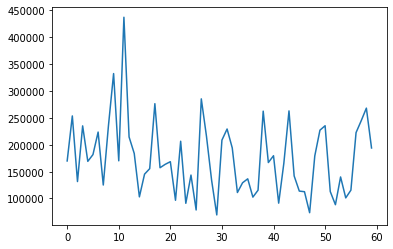

In [10]:
 cumulative_latency.plot()

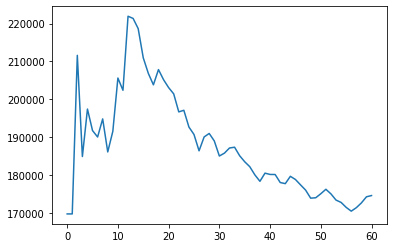

In [11]:
cumulative_avg.plot()

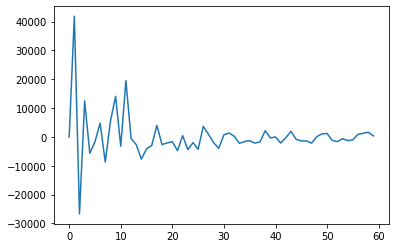

In [12]:
cumulative_err.plot()

In [43]:
test0 = cumulative_avg()

------------------------------reset binary gate------------------------------


2020-05-02 12:45:52:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:45:54:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:45:56:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:45:58:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:46:00:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     208108.782768
std       28558.044608
min       11987.447739
25%      210863.113403
50%      211841.702461
75%      212314.903736
max      237001.895905
Name: latency, dtype: float64
cumulative_avg, pre_avg: 211473.1788635254, 211473.1788635254
convergence ratio: 0.0
------------------------------reset binary gate------------------------------


2020-05-02 12:46:03:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:46:05:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:46:07:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:46:09:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:46:11:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     214139.146805
std       29510.247147
min        9987.592697
25%      217805.087566
50%      218535.900116
75%      219340.920448
max      220497.131348
Name: latency, dtype: float64
cumulative_avg, pre_avg: 214899.23000335693, 211473.1788635254
convergence ratio: 1.594259383701852
------------------------------reset binary gate------------------------------


2020-05-02 12:46:13:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:46:15:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:46:16:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:46:18:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:46:19:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     143988.180161
std       19305.515476
min       10663.986206
25%      146366.775036
50%      147139.310837
75%      147303.879261
max      149865.627289
Name: latency, dtype: float64
cumulative_avg, pre_avg: 192263.2853190104, 214899.23000335693
convergence ratio: -11.773409908599099
------------------------------reset binary gate------------------------------


2020-05-02 12:46:20:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:46:21:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:46:22:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:46:23:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:46:24:pid_34414:latency_estimator:<INFO> 50 times estimation


count       50.000000
mean     91330.919266
std      11657.088886
min      11104.345322
25%      92903.494835
50%      93325.614929
75%      93464.612961
max      94264.984131
Name: latency, dtype: float64
cumulative_avg, pre_avg: 167494.27318572998, 192263.2853190104
convergence ratio: -14.787975530252739
------------------------------reset binary gate------------------------------


2020-05-02 12:46:25:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:46:27:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:46:28:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:46:29:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:46:30:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     118777.680397
std       16388.107845
min        5470.037460
25%      121126.353741
50%      121334.195137
75%      121550.321579
max      122363.090515
Name: latency, dtype: float64
cumulative_avg, pre_avg: 158246.1929321289, 167494.27318572998
convergence ratio: -5.84410915816947
------------------------------reset binary gate------------------------------


2020-05-02 12:46:32:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:46:33:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:46:35:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:46:37:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:46:38:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     150305.562019
std       20019.580426
min       11928.081512
25%      153185.486794
50%      153378.844261
75%      153659.880161
max      156105.518341
Name: latency, dtype: float64
cumulative_avg, pre_avg: 157426.13474527994, 158246.1929321289
convergence ratio: -0.5209161669222496
------------------------------reset binary gate------------------------------


2020-05-02 12:46:39:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:46:41:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:46:42:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:46:43:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:46:44:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     110583.591461
std       14541.416358
min       10294.675827
25%      112680.137157
50%      112958.669662
75%      113106.787205
max      114516.735077
Name: latency, dtype: float64
cumulative_avg, pre_avg: 151061.9980948312, 157426.13474527994
convergence ratio: -4.212930274133923
------------------------------reset binary gate------------------------------


2020-05-02 12:46:46:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:46:48:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:46:51:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:46:53:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:46:55:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     218162.484169
std       30073.679661
min       10153.293610
25%      222349.882126
50%      222682.714462
75%      223133.385181
max      225338.220596
Name: latency, dtype: float64
cumulative_avg, pre_avg: 159996.34265899658, 151061.9980948312
convergence ratio: 5.584092995930128
------------------------------reset binary gate------------------------------


2020-05-02 12:46:57:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:46:59:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:47:02:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:47:04:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:47:06:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     204515.647888
std       27785.785903
min       12382.507324
25%      208486.318588
50%      208714.604378
75%      209014.892578
max      209890.127182
Name: latency, dtype: float64
cumulative_avg, pre_avg: 165399.6149698893, 159996.34265899658
convergence ratio: 3.266798602811975
------------------------------reset binary gate------------------------------


2020-05-02 12:47:07:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:47:08:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:47:10:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:47:11:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:47:12:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     117799.987793
std       15513.218165
min       10804.414749
25%      120108.425617
50%      120382.666588
75%      120451.986790
max      121429.443359
Name: latency, dtype: float64
cumulative_avg, pre_avg: 160893.85509490967, 165399.6149698893
convergence ratio: -2.800454916268706
------------------------------reset binary gate------------------------------


2020-05-02 12:47:14:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:47:16:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:47:18:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:47:20:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:47:22:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     201315.355301
std       27660.107769
min        9912.252426
25%      205155.193806
50%      205499.768257
75%      205783.784389
max      206231.594086
Name: latency, dtype: float64
cumulative_avg, pre_avg: 164936.25207380814, 160893.85509490967
convergence ratio: 2.450884464798871
------------------------------reset binary gate------------------------------


2020-05-02 12:47:25:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:47:27:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:47:29:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:47:32:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:47:34:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     227856.540680
std       31437.067116
min       10207.653046
25%      232165.634632
50%      232558.131218
75%      232811.629772
max      233678.340912
Name: latency, dtype: float64
cumulative_avg, pre_avg: 170563.72165679932, 164936.25207380814
convergence ratio: 3.299335596296686
------------------------------reset binary gate------------------------------


2020-05-02 12:47:36:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:47:39:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:47:41:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:47:43:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:47:45:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     203552.260399
std       28272.073607
min        7725.954056
25%      207222.878933
50%      207809.805870
75%      208030.700684
max      208676.099777
Name: latency, dtype: float64
cumulative_avg, pre_avg: 173418.1000636174, 170563.72165679932
convergence ratio: 1.6459518388051602
------------------------------reset binary gate------------------------------


2020-05-02 12:47:46:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:47:48:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:47:49:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:47:50:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:47:52:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     131754.851341
std       17470.962456
min       11204.719543
25%      134192.645550
50%      134515.643120
75%      134854.674339
max      136152.744293
Name: latency, dtype: float64
cumulative_avg, pre_avg: 170634.14028712682, 173418.1000636174
convergence ratio: -1.6315373768731136
------------------------------reset binary gate------------------------------


2020-05-02 12:47:55:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:47:57:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:48:00:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:48:03:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:48:06:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     276409.568787
std       38354.382609
min       10760.307312
25%      281762.123108
50%      282195.925713
75%      282360.613346
max      282872.915268
Name: latency, dtype: float64
cumulative_avg, pre_avg: 178065.7418568929, 170634.14028712682
convergence ratio: 4.1735156309508925
------------------------------reset binary gate------------------------------


2020-05-02 12:48:08:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:48:10:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:48:12:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:48:13:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:48:15:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     175170.845985
std       24179.571086
min        7807.731628
25%      178677.022457
50%      178868.889809
75%      178991.079330
max      179860.591888
Name: latency, dtype: float64
cumulative_avg, pre_avg: 178110.50415039062, 178065.7418568929
convergence ratio: 0.02513175385765898
------------------------------reset binary gate------------------------------


2020-05-02 12:48:17:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:48:19:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:48:21:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:48:23:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:48:25:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     182108.559608
std       24807.474854
min       10525.465012
25%      185607.135296
50%      185964.584351
75%      186210.572720
max      186916.112900
Name: latency, dtype: float64
cumulative_avg, pre_avg: 178561.4294164321, 178110.50415039062
convergence ratio: 0.2525322895964576
------------------------------reset binary gate------------------------------


2020-05-02 12:48:26:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:48:27:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:48:28:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:48:29:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:48:30:pid_34414:latency_estimator:<INFO> 50 times estimation


count       50.000000
mean     93424.654007
std      12093.433974
min      10295.867920
25%      95238.208771
50%      95412.969589
75%      95609.843731
max      96325.159073
Name: latency, dtype: float64
cumulative_avg, pre_avg: 173939.18567233614, 178561.4294164321
convergence ratio: -2.657390700220519
------------------------------reset binary gate------------------------------


2020-05-02 12:48:32:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:48:34:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:48:36:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:48:39:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:48:41:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     218539.385796
std       30047.667846
min       10644.197464
25%      222795.903683
50%      223084.688187
75%      223369.359970
max      224810.361862
Name: latency, dtype: float64
cumulative_avg, pre_avg: 176521.86594511333, 173939.18567233614
convergence ratio: 1.4630936847111224
------------------------------reset binary gate------------------------------


2020-05-02 12:48:42:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:48:43:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:48:44:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:48:45:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:48:45:pid_34414:latency_estimator:<INFO> 50 times estimation


count       50.000000
mean     79896.116257
std      10415.112869
min       8635.759354
25%      81436.753273
50%      81764.817238
75%      81947.922707
max      82825.183868
Name: latency, dtype: float64
cumulative_avg, pre_avg: 171773.96059036255, 176521.86594511333
convergence ratio: -2.764042546630995
------------------------------reset binary gate------------------------------


2020-05-02 12:48:46:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:48:46:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:48:47:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:48:47:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:48:47:pid_34414:latency_estimator:<INFO> 50 times estimation


count       50.000000
mean     34922.604561
std       3889.106458
min      10028.362274
25%      35553.097725
50%      35670.638084
75%      35853.207111
max      36667.346954
Name: latency, dtype: float64
cumulative_avg, pre_avg: 165290.73942275275, 171773.96059036255
convergence ratio: -3.9223136094927287
------------------------------reset binary gate------------------------------


2020-05-02 12:48:49:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:48:50:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:48:52:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:48:54:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:48:55:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     148548.870087
std       20532.243599
min        6509.065628
25%      151272.416115
50%      151599.287987
75%      151861.846447
max      154617.071152
Name: latency, dtype: float64
cumulative_avg, pre_avg: 164661.8366241455, 165290.73942275275
convergence ratio: -0.38193597952072555
------------------------------reset binary gate------------------------------


2020-05-02 12:48:57:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:49:00:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:49:02:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:49:04:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:49:07:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     225468.773842
std       31327.421548
min        8776.903152
25%      229136.407375
50%      229664.206505
75%      230403.482914
max      234431.028366
Name: latency, dtype: float64
cumulative_avg, pre_avg: 167479.94837553604, 164661.8366241455
convergence ratio: 1.6826562097281956
------------------------------reset binary gate------------------------------


2020-05-02 12:49:08:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:49:09:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:49:10:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:49:12:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:49:13:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     113213.124275
std       15213.651854
min        8268.356323
25%      114638.507366
50%      115075.826645
75%      116284.012794
max      118175.268173
Name: latency, dtype: float64
cumulative_avg, pre_avg: 165287.38935788473, 167479.94837553604
convergence ratio: -1.326513187829423
------------------------------reset binary gate------------------------------


2020-05-02 12:49:14:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:49:15:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:49:16:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:49:17:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:49:18:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean      98494.691849
std       12934.348922
min        9521.484375
25%       99768.936634
50%      100197.076797
75%      101136.088371
max      102666.854858
Name: latency, dtype: float64
cumulative_avg, pre_avg: 162681.01692199707, 165287.38935788473
convergence ratio: -1.6021367982580155
------------------------------reset binary gate------------------------------


2020-05-02 12:49:20:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:49:21:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:49:23:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:49:25:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:49:26:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     161251.835823
std       21714.722031
min       11200.666428
25%      164076.745510
50%      164618.492126
75%      164878.904819
max      167097.330093
Name: latency, dtype: float64
cumulative_avg, pre_avg: 162748.21758270264, 162681.01692199707
convergence ratio: 0.04129118075988606
------------------------------reset binary gate------------------------------


2020-05-02 12:49:29:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:49:33:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:49:36:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:49:39:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:49:42:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     318500.876427
std       44381.674103
min       11465.311050
25%      323386.311531
50%      324290.513992
75%      326872.467995
max      328188.180923
Name: latency, dtype: float64
cumulative_avg, pre_avg: 168715.16439649794, 162748.21758270264
convergence ratio: 3.5366985742741956
------------------------------reset binary gate------------------------------


2020-05-02 12:49:45:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:49:47:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:49:49:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:49:51:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:49:53:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     205052.390099
std       28136.239732
min       10568.618774
25%      208015.620708
50%      209004.759789
75%      210306.167603
max      212497.711182
Name: latency, dtype: float64
cumulative_avg, pre_avg: 170136.6799218314, 168715.16439649794
convergence ratio: 0.8355138503858053
------------------------------reset binary gate------------------------------


2020-05-02 12:49:55:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:49:57:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:49:58:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:50:00:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:50:01:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     151088.013649
std       20774.346355
min        7791.519165
25%      152618.288994
50%      154539.704323
75%      155343.055725
max      156883.478165
Name: latency, dtype: float64
cumulative_avg, pre_avg: 169555.27765997525, 170136.6799218314
convergence ratio: -0.3428983573263327
------------------------------reset binary gate------------------------------


2020-05-02 12:50:02:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:50:03:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:50:04:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:50:05:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:50:06:pid_34414:latency_estimator:<INFO> 50 times estimation


count       50.000000
mean     80304.236412
std      10214.095578
min      10751.724243
25%      81073.939800
50%      81878.900528
75%      82804.143429
max      84233.045578
Name: latency, dtype: float64
cumulative_avg, pre_avg: 166616.30471547446, 169555.27765997525
convergence ratio: -1.7639167724428841
------------------------------reset binary gate------------------------------


2020-05-02 12:50:07:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:50:08:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:50:09:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:50:10:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:50:11:pid_34414:latency_estimator:<INFO> 50 times estimation


count       50.000000
mean     94211.483002
std      12369.809428
min       8995.056152
25%      95908.463001
50%      96258.640289
75%      96399.664879
max      98591.327667
Name: latency, dtype: float64
cumulative_avg, pre_avg: 164342.9663873488, 166616.30471547446
convergence ratio: -1.3832890923774006
------------------------------reset binary gate------------------------------


2020-05-02 12:50:13:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:50:15:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:50:18:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:50:20:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:50:22:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     225894.041061
std       31332.809329
min        9508.371353
25%      228145.360947
50%      229562.401772
75%      232539.892197
max      234074.354172
Name: latency, dtype: float64
cumulative_avg, pre_avg: 166372.79987335205, 164342.9663873488
convergence ratio: 1.2200512869582156
------------------------------reset binary gate------------------------------


2020-05-02 12:50:25:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:50:28:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:50:31:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:50:34:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:50:37:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     282665.414810
std       39848.209579
min        6879.568100
25%      287414.193153
50%      288719.534874
75%      289746.940136
max      290641.069412
Name: latency, dtype: float64
cumulative_avg, pre_avg: 170064.6111459443, 166372.79987335205
convergence ratio: 2.170828632550751
------------------------------reset binary gate------------------------------


2020-05-02 12:50:38:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:50:40:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:50:41:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:50:42:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:50:43:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     113256.878853
std       14830.613942
min       11247.158051
25%      114775.478840
50%      115457.296371
75%      116061.925888
max      117878.913879
Name: latency, dtype: float64
cumulative_avg, pre_avg: 168454.54889185287, 170064.6111459443
convergence ratio: -0.9557843731041583
------------------------------reset binary gate------------------------------


2020-05-02 12:50:45:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:50:47:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:50:49:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:50:51:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:50:53:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     195437.793732
std       26786.251938
min       10601.997375
25%      198087.334633
50%      199917.554855
75%      200616.300106
max      202051.639557
Name: latency, dtype: float64
cumulative_avg, pre_avg: 169341.2903376988, 168454.54889185287
convergence ratio: 0.5236416021618785
------------------------------reset binary gate------------------------------


2020-05-02 12:50:55:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:50:57:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:50:59:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:51:02:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:51:04:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     206648.182869
std       28233.280075
min       11813.640594
25%      210006.296635
50%      211243.748665
75%      211821.854115
max      214300.394058
Name: latency, dtype: float64
cumulative_avg, pre_avg: 170495.11406156752, 169341.2903376988
convergence ratio: 0.6767488500884966
------------------------------reset binary gate------------------------------


2020-05-02 12:51:07:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:51:10:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:51:13:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:51:15:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:51:18:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     287459.058762
std       40486.661060
min        7038.116455
25%      292671.263218
50%      293510.198593
75%      293872.058392
max      295297.622681
Name: latency, dtype: float64
cumulative_avg, pre_avg: 173813.00024084141, 170495.11406156752
convergence ratio: 1.9088826351748776
------------------------------reset binary gate------------------------------


2020-05-02 12:51:20:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:51:21:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:51:22:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:51:22:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:51:23:pid_34414:latency_estimator:<INFO> 50 times estimation


count       50.000000
mean     85175.385475
std      11359.579823
min       6837.606430
25%      86574.018002
50%      86703.538895
75%      87178.289890
max      90101.003647
Name: latency, dtype: float64
cumulative_avg, pre_avg: 171519.56934677926, 173813.00024084141
convergence ratio: -1.337124913965522
------------------------------reset binary gate------------------------------


2020-05-02 12:51:24:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:51:25:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:51:26:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:51:27:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:51:27:pid_34414:latency_estimator:<INFO> 50 times estimation


count       50.000000
mean     76957.578659
std       9876.507406
min       9148.120880
25%      78357.100487
50%      78462.839127
75%      78564.107418
max      80265.045166
Name: latency, dtype: float64
cumulative_avg, pre_avg: 169132.9308045216, 171519.56934677926
convergence ratio: -1.4111022205463093
------------------------------reset binary gate------------------------------


2020-05-02 12:51:30:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:51:33:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:51:35:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:51:38:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:51:40:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     257384.004593
std       35672.827081
min       10972.738266
25%      261950.612068
50%      262612.581253
75%      263971.626759
max      265341.520309
Name: latency, dtype: float64
cumulative_avg, pre_avg: 171461.7621898651, 169132.9308045216
convergence ratio: 1.3582220056532024
------------------------------reset binary gate------------------------------


2020-05-02 12:51:44:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:51:47:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:51:50:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:51:53:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:51:56:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     296128.821373
std       41257.857387
min       10473.966599
25%      301891.803741
50%      302234.768867
75%      302475.214005
max      304720.401764
Name: latency, dtype: float64
cumulative_avg, pre_avg: 174650.7481830876, 171461.7621898651
convergence ratio: 1.8259217474862706
------------------------------reset binary gate------------------------------


2020-05-02 12:51:58:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:51:59:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:52:00:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:52:02:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:52:03:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     141786.861420
std       18967.702426
min       10749.816895
25%      144342.243671
50%      144713.878632
75%      145051.717758
max      146074.295044
Name: latency, dtype: float64
cumulative_avg, pre_avg: 173936.06503804526, 174650.7481830876
convergence ratio: -0.4108884174688042
------------------------------reset binary gate------------------------------


2020-05-02 12:52:06:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:52:08:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:52:10:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:52:12:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:52:14:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     211178.369522
std       29522.076667
min        6959.915161
25%      214725.732803
50%      215845.823288
75%      216380.953789
max      217322.587967
Name: latency, dtype: float64
cumulative_avg, pre_avg: 174899.62134250376, 173936.06503804526
convergence ratio: 0.5509196058072529
------------------------------reset binary gate------------------------------


2020-05-02 12:52:18:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:52:22:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:52:25:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:52:29:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:52:33:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     366776.142120
std       51352.615627
min       11089.801788
25%      373394.370079
50%      374358.057976
75%      374848.663807
max      376409.769058
Name: latency, dtype: float64
cumulative_avg, pre_avg: 179425.48123272983, 174899.62134250376
convergence ratio: 2.522417584799816
------------------------------reset binary gate------------------------------


2020-05-02 12:52:36:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:52:38:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:52:41:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:52:43:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:52:45:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     239442.596436
std       32937.342682
min       11644.363403
25%      243109.643459
50%      244302.511215
75%      245373.845100
max      246705.532074
Name: latency, dtype: float64
cumulative_avg, pre_avg: 180856.43450419107, 179425.48123272983
convergence ratio: 0.7912094891089336
------------------------------reset binary gate------------------------------


2020-05-02 12:52:48:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:52:50:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:52:52:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:52:54:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:52:56:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     204241.824150
std       27610.754417
min       13593.912125
25%      207393.169403
50%      208540.439606
75%      209227.323532
max      211600.303650
Name: latency, dtype: float64
cumulative_avg, pre_avg: 181455.5313276208, 180856.43450419107
convergence ratio: 0.3301617862219032
------------------------------reset binary gate------------------------------


2020-05-02 12:52:58:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:52:59:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:53:00:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:53:02:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:53:03:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     129791.998863
std       17379.194148
min        9795.427322
25%      131735.384464
50%      132721.543312
75%      133049.249649
max      133729.457855
Name: latency, dtype: float64
cumulative_avg, pre_avg: 180408.91302392838, 181455.5313276208
convergence ratio: -0.5801366939967026
------------------------------reset binary gate------------------------------


2020-05-02 12:53:05:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:53:08:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:53:10:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:53:12:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:53:14:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     214843.688011
std       29877.357239
min        8313.417435
25%      218348.562717
50%      219627.499580
75%      220439.016819
max      221546.649933
Name: latency, dtype: float64
cumulative_avg, pre_avg: 181216.38198693594, 180408.91302392838
convergence ratio: 0.4455827636299296
------------------------------reset binary gate------------------------------


2020-05-02 12:53:16:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:53:17:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:53:18:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:53:19:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:53:20:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     111882.896423
std       15430.082799
min        5465.745926
25%      113131.582737
50%      113688.111305
75%      114964.306355
max      117512.941360
Name: latency, dtype: float64
cumulative_avg, pre_avg: 179834.6354036915, 181216.38198693594
convergence ratio: -0.7683428612862636
------------------------------reset binary gate------------------------------


2020-05-02 12:53:22:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:53:25:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:53:27:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:53:30:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:53:32:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     232816.491127
std       32069.683325
min       11328.458786
25%      236305.952072
50%      237832.665443
75%      238907.873631
max      240189.075470
Name: latency, dtype: float64
cumulative_avg, pre_avg: 180986.28044128418, 179834.6354036915
convergence ratio: 0.6363162084908961
------------------------------reset binary gate------------------------------


2020-05-02 12:53:35:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:53:38:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:53:41:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:53:44:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:53:47:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     298380.298615
std       41701.587402
min        9976.625443
25%      302577.376366
50%      304420.351982
75%      306163.489819
max      308383.703232
Name: latency, dtype: float64
cumulative_avg, pre_avg: 183401.1947407442, 180986.28044128418
convergence ratio: 1.3167385866126624
------------------------------reset binary gate------------------------------


2020-05-02 12:53:51:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:53:55:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:53:59:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:54:03:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:54:07:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     387933.726311
std       54365.638316
min       11617.183685
25%      394424.259663
50%      395899.176598
75%      397769.749165
max      399265.289307
Name: latency, dtype: float64
cumulative_avg, pre_avg: 187480.56154984696, 183401.1947407442
convergence ratio: 2.175887876257588
------------------------------reset binary gate------------------------------


2020-05-02 12:54:10:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:54:13:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:54:15:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:54:18:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:54:20:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     244236.116409
std       33572.786015
min       12243.270874
25%      247933.328152
50%      249750.971794
75%      250472.426414
max      251571.416855
Name: latency, dtype: float64
cumulative_avg, pre_avg: 188649.54102714107, 187480.56154984696
convergence ratio: 0.6196566771004909
reset times, hit counts: 52, 1
------------------------------reset binary gate------------------------------


2020-05-02 12:54:23:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:54:26:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:54:29:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:54:32:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:54:35:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     287561.168671
std       40009.844950
min       10713.577271
25%      292266.488075
50%      293642.997742
75%      294437.229633
max      296184.062958
Name: latency, dtype: float64
cumulative_avg, pre_avg: 190589.92509488706, 188649.54102714107
convergence ratio: 1.0180937249332338
------------------------------reset binary gate------------------------------


2020-05-02 12:54:37:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:54:39:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:54:41:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:54:43:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:54:45:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     200536.289215
std       27301.501612
min       12392.044067
25%      203567.147255
50%      204746.603966
75%      205741.405487
max      208732.843399
Name: latency, dtype: float64
cumulative_avg, pre_avg: 190840.93180569736, 190589.92509488706
convergence ratio: 0.13152666382170863
reset times, hit counts: 54, 1
------------------------------reset binary gate------------------------------


2020-05-02 12:54:47:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:54:48:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:54:50:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:54:51:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:54:52:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     123866.810799
std       16592.131541
min        9759.902954
25%      125114.440918
50%      126758.813858
75%      127603.173256
max      128839.254379
Name: latency, dtype: float64
cumulative_avg, pre_avg: 189688.46116747175, 190840.93180569736
convergence ratio: -0.6075596961104139
reset times, hit counts: 55, 2
------------------------------reset binary gate------------------------------


2020-05-02 12:54:53:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:54:55:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:54:56:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:54:57:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:54:58:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     110077.753067
std       14760.622535
min        8746.623993
25%      111413.359642
50%      112379.312515
75%      113186.419010
max      115048.885345
Name: latency, dtype: float64
cumulative_avg, pre_avg: 188329.02573702627, 189688.46116747175
convergence ratio: -0.7218406324385317
reset times, hit counts: 56, 3
------------------------------reset binary gate------------------------------


2020-05-02 12:55:00:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:55:03:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:55:05:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:55:08:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:55:10:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     237616.071701
std       32737.460401
min       11503.934860
25%      241063.714027
50%      242719.292641
75%      244098.007679
max      245290.994644
Name: latency, dtype: float64
cumulative_avg, pre_avg: 189257.03887281747, 188329.02573702627
convergence ratio: 0.4903453743746022
reset times, hit counts: 57, 4
------------------------------reset binary gate------------------------------


2020-05-02 12:55:13:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:55:15:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:55:18:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:55:20:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:55:22:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     241664.762497
std       33664.851722
min        8891.344070
25%      245412.051678
50%      246885.657310
75%      247731.983662
max      249670.505524
Name: latency, dtype: float64
cumulative_avg, pre_avg: 190223.46512746002, 189257.03887281747
convergence ratio: 0.5080478657009992
reset times, hit counts: 58, 5
------------------------------reset binary gate------------------------------


2020-05-02 12:55:25:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:55:27:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:55:30:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:55:32:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:55:34:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     223251.395226
std       30698.696675
min       11529.684067
25%      226540.505886
50%      227891.683578
75%      229704.856873
max      230861.902237
Name: latency, dtype: float64
cumulative_avg, pre_avg: 190841.8607711792, 190223.46512746002
convergence ratio: 0.32403563936145113
reset times, hit counts: 59, 6
------------------------------reset binary gate------------------------------


2020-05-02 12:55:36:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:55:37:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:55:39:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:55:40:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:55:42:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     137624.363899
std       18474.185120
min       10342.121124
25%      139757.335186
50%      140307.188034
75%      141323.924065
max      142504.930496
Name: latency, dtype: float64
cumulative_avg, pre_avg: 190011.83744336737, 190841.8607711792
convergence ratio: -0.4368271677069654
reset times, hit counts: 60, 7
------------------------------reset binary gate------------------------------


2020-05-02 12:55:42:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:55:43:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:55:43:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:55:44:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:55:45:pid_34414:latency_estimator:<INFO> 50 times estimation


count       50.000000
mean     53267.121315
std       6488.254947
min       9751.796722
25%      53817.510605
50%      54445.385933
75%      55039.584637
max      56124.210358
Name: latency, dtype: float64
cumulative_avg, pre_avg: 187823.06178923577, 190011.83744336737
convergence ratio: -1.1653391406150768
reset times, hit counts: 61, 8
------------------------------reset binary gate------------------------------


2020-05-02 12:55:46:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:55:48:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:55:50:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:55:52:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:55:54:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     195597.667694
std       26733.957328
min       11107.921600
25%      198455.691338
50%      199736.356735
75%      200970.470905
max      202229.499817
Name: latency, dtype: float64
cumulative_avg, pre_avg: 188004.32568504696, 187823.06178923577
convergence ratio: 0.09641474745365919
reset times, hit counts: 62, 9
------------------------------reset binary gate------------------------------


2020-05-02 12:55:56:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:55:57:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:55:58:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:55:59:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:56:01:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     112849.960327
std       15126.711028
min        9172.201157
25%      114102.303982
50%      115382.909775
75%      116081.953049
max      117765.903473
Name: latency, dtype: float64
cumulative_avg, pre_avg: 186861.91588640213, 188004.32568504696
convergence ratio: -0.6113657741470075
reset times, hit counts: 63, 10


In [44]:
cum0, err0, lat0= pd.Series(test0[0]), pd.Series(test0[1]), pd.Series(test0[2])

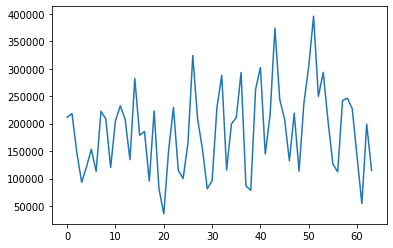

In [46]:
lat0.plot()

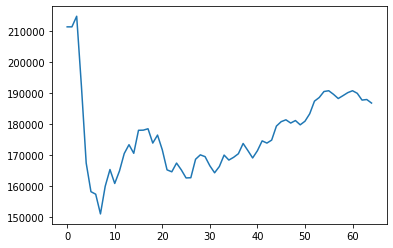

In [48]:
cum0.plot()

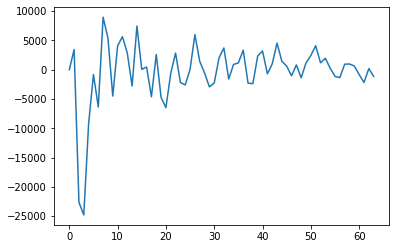

In [49]:
err0.plot()

In [23]:
test1 = cumulative_avg()

------------------------------reset binary gate------------------------------


2020-05-02 12:06:12:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:06:13:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:06:15:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:06:17:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:06:18:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     154780.278206
std       21015.319775
min        9753.942490
25%      157191.336155
50%      157734.513283
75%      158011.734486
max      169167.041779
Name: latency, dtype: float64
cumulative_avg, pre_avg: 157581.42471313477, 157581.42471313477
convergence ratio: 0.0
------------------------------reset binary gate------------------------------


2020-05-02 12:06:20:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:06:23:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:06:25:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:06:27:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:06:29:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     215567.727089
std       29473.949231
min       11705.636978
25%      219306.766987
50%      220140.695572
75%      220884.263515
max      221329.689026
Name: latency, dtype: float64
cumulative_avg, pre_avg: 188733.10089111328, 157581.42471313477
convergence ratio: 16.505677080964727
------------------------------reset binary gate------------------------------


2020-05-02 12:06:31:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:06:32:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:06:33:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:06:35:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:06:36:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     121905.264854
std       15971.424571
min       11707.305908
25%      123945.951462
50%      124440.908432
75%      124695.062637
max      125506.639481
Name: latency, dtype: float64
cumulative_avg, pre_avg: 167212.96310424805, 188733.10089111328
convergence ratio: 12.86989799555709
------------------------------reset binary gate------------------------------


2020-05-02 12:06:37:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:06:39:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:06:40:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:06:42:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:06:43:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     144100.437164
std       19298.708305
min       10824.441910
25%      146694.779396
50%      147088.170052
75%      147476.077080
max      148200.988770
Name: latency, dtype: float64
cumulative_avg, pre_avg: 162170.68433761597, 167212.96310424805
convergence ratio: 3.1092418381455325
------------------------------reset binary gate------------------------------


2020-05-02 12:06:46:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:06:50:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:06:53:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:06:56:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:07:00:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     324228.539467
std       45058.894484
min       12143.611908
25%      329856.157303
50%      330676.317215
75%      331444.025040
max      332584.142685
Name: latency, dtype: float64
cumulative_avg, pre_avg: 195832.4909210205, 162170.68433761597
convergence ratio: 17.1890815589842
------------------------------reset binary gate------------------------------


2020-05-02 12:07:02:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:07:05:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:07:07:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:07:09:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:07:12:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     224999.980927
std       30891.307030
min       11261.701584
25%      229122.459888
50%      229833.126068
75%      230082.571507
max      231045.484543
Name: latency, dtype: float64
cumulative_avg, pre_avg: 201483.88544718424, 195832.4909210205
convergence ratio: 2.804886610966786
------------------------------reset binary gate------------------------------


2020-05-02 12:07:14:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:07:17:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:07:19:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:07:22:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:07:24:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     250026.583672
std       34433.000210
min       11598.348618
25%      254925.251007
50%      255198.478699
75%      255520.224571
max      255968.093872
Name: latency, dtype: float64
cumulative_avg, pre_avg: 209142.1059199742, 201483.88544718424
convergence ratio: 3.6617305917921095
------------------------------reset binary gate------------------------------


2020-05-02 12:07:26:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:07:28:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:07:29:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:07:30:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:07:32:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     135670.266151
std       17841.534496
min       12784.004211
25%      138089.239597
50%      138684.749603
75%      138893.365860
max      141128.540039
Name: latency, dtype: float64
cumulative_avg, pre_avg: 200328.12356948853, 209142.1059199742
convergence ratio: 4.3997728294142
------------------------------reset binary gate------------------------------


2020-05-02 12:07:34:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:07:35:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:07:37:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:07:38:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:07:40:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     153488.564491
std       20541.320913
min       11473.178864
25%      156496.047974
50%      156692.743301
75%      156922.042370
max      157384.157181
Name: latency, dtype: float64
cumulative_avg, pre_avg: 195475.8644104004, 200328.12356948853
convergence ratio: 2.482280446091721
------------------------------reset binary gate------------------------------


2020-05-02 12:07:41:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:07:42:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:07:42:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:07:43:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:07:44:pid_34414:latency_estimator:<INFO> 50 times estimation


count       50.000000
mean     70347.175598
std       9269.820947
min       6386.280060
25%      71522.593498
50%      71804.046631
75%      72015.643120
max      73207.855225
Name: latency, dtype: float64
cumulative_avg, pre_avg: 183103.2133102417, 195475.8644104004
convergence ratio: 6.757200420723933
------------------------------reset binary gate------------------------------


2020-05-02 12:07:45:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:07:47:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:07:49:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:07:50:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:07:52:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     158570.938110
std       21176.962097
min       12145.519257
25%      161475.241184
50%      161909.461021
75%      162053.644657
max      162957.191467
Name: latency, dtype: float64
cumulative_avg, pre_avg: 181167.45081814853, 183103.2133102417
convergence ratio: 1.0684935309026573
------------------------------reset binary gate------------------------------


2020-05-02 12:07:53:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:07:55:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:07:56:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:07:57:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:07:59:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     128056.712151
std       17414.028522
min        7722.139359
25%      130557.775497
50%      130871.295929
75%      131033.301353
max      132416.725159
Name: latency, dtype: float64
cumulative_avg, pre_avg: 176966.27775828043, 181167.45081814853
convergence ratio: 2.373996398119712
------------------------------reset binary gate------------------------------


2020-05-02 12:08:00:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:08:02:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:08:04:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:08:05:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:08:07:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     157625.336647
std       22005.506100
min        5323.886871
25%      160581.529140
50%      160927.772522
75%      161189.079285
max      162367.582321
Name: latency, dtype: float64
cumulative_avg, pre_avg: 175727.5471320519, 176966.27775828043
convergence ratio: 0.7049154480587344
------------------------------reset binary gate------------------------------


2020-05-02 12:08:08:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:08:08:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:08:09:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:08:09:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:08:10:pid_34414:latency_estimator:<INFO> 50 times estimation


count       50.000000
mean     47974.910736
std       5618.971303
min      10097.265244
25%      48784.255981
50%      48977.494240
75%      49127.697945
max      51029.920578
Name: latency, dtype: float64
cumulative_avg, pre_avg: 166668.85103498187, 175727.5471320519
convergence ratio: 5.435146424072195
------------------------------reset binary gate------------------------------


2020-05-02 12:08:11:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:08:12:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:08:14:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:08:15:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:08:16:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     130526.762009
std       17938.257120
min        6330.013275
25%      132903.456688
50%      133235.335350
75%      133453.369141
max      134517.192841
Name: latency, dtype: float64
cumulative_avg, pre_avg: 164432.5065612793, 166668.85103498187
convergence ratio: 1.3600379392557331
------------------------------reset binary gate------------------------------


2020-05-02 12:08:18:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:08:19:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:08:21:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:08:22:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:08:23:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     128372.631073
std       17061.873916
min       10690.212250
25%      130620.360374
50%      131079.077721
75%      131342.411041
max      133348.941803
Name: latency, dtype: float64
cumulative_avg, pre_avg: 162342.03577041626, 164432.5065612793
convergence ratio: 1.287695316214573
------------------------------reset binary gate------------------------------


2020-05-02 12:08:26:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:08:28:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:08:31:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:08:33:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:08:35:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     242117.309570
std       33491.162110
min       10312.318802
25%      246861.040592
50%      247181.892395
75%      247472.643852
max      249381.303787
Name: latency, dtype: float64
cumulative_avg, pre_avg: 167328.1753764433, 162342.03577041626
convergence ratio: 2.9798565572173237
------------------------------reset binary gate------------------------------


2020-05-02 12:08:37:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:08:39:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:08:41:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:08:42:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:08:44:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     154454.216957
std       20951.295558
min        9641.885757
25%      157419.919968
50%      157674.193382
75%      158011.853695
max      159332.275391
Name: latency, dtype: float64
cumulative_avg, pre_avg: 166786.879963345, 167328.1753764433
convergence ratio: 0.3245431614388729
------------------------------reset binary gate------------------------------


2020-05-02 12:08:45:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:08:47:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:08:48:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:08:50:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:08:52:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     149284.911156
std       20630.258244
min        6501.913071
25%      152186.989784
50%      152399.420738
75%      152677.953243
max      153622.388840
Name: latency, dtype: float64
cumulative_avg, pre_avg: 166025.121588456, 166786.879963345
convergence ratio: 0.45882115164309517
------------------------------reset binary gate------------------------------


2020-05-02 12:08:54:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:08:55:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:08:57:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:08:59:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:09:01:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     186821.665764
std       25519.381815
min       10333.538055
25%      190429.687500
50%      190766.334534
75%      190999.984741
max      191579.341888
Name: latency, dtype: float64
cumulative_avg, pre_avg: 167260.72311401367, 166025.121588456
convergence ratio: 0.7387278391206125
------------------------------reset binary gate------------------------------


2020-05-02 12:09:04:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:09:06:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:09:08:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:09:10:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:09:13:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     220275.392532
std       30447.727811
min        9489.774704
25%      224581.539631
50%      224875.569344
75%      225108.861923
max      225990.772247
Name: latency, dtype: float64
cumulative_avg, pre_avg: 170001.11625308084, 167260.72311401367
convergence ratio: 1.6119853795474721
------------------------------reset binary gate------------------------------


2020-05-02 12:09:15:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:09:16:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:09:18:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:09:20:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:09:22:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     177154.469490
std       24715.087388
min        5999.565125
25%      180697.321892
50%      180897.712708
75%      181023.776531
max      182019.472122
Name: latency, dtype: float64
cumulative_avg, pre_avg: 170493.85200847278, 170001.11625308084
convergence ratio: 0.28900499905853266
------------------------------reset binary gate------------------------------


2020-05-02 12:09:23:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:09:25:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:09:26:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:09:28:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:09:29:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     134749.860764
std       18722.938498
min        5227.565765
25%      137314.081192
50%      137601.375580
75%      137846.708298
max      138548.851013
Name: latency, dtype: float64
cumulative_avg, pre_avg: 169060.18879102624, 170493.85200847278
convergence ratio: 0.8480194111333165
------------------------------reset binary gate------------------------------


2020-05-02 12:09:31:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:09:33:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:09:35:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:09:37:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:09:39:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     185102.229118
std       25443.822223
min        9015.083313
25%      188551.425934
50%      188947.200775
75%      189190.149307
max      190122.604370
Name: latency, dtype: float64
cumulative_avg, pre_avg: 169884.98767217, 169060.18879102624
convergence ratio: 0.48550427700851156
------------------------------reset binary gate------------------------------


2020-05-02 12:09:41:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:09:43:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:09:45:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:09:47:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:09:49:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     206336.417198
std       28838.059334
min        6611.108780
25%      210108.101368
50%      210546.016693
75%      210840.523243
max      212237.119675
Name: latency, dtype: float64
cumulative_avg, pre_avg: 171509.65309143066, 169884.98767217
convergence ratio: 0.947273456610954
------------------------------reset binary gate------------------------------


2020-05-02 12:09:50:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:09:51:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:09:52:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:09:53:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:09:54:pid_34414:latency_estimator:<INFO> 50 times estimation


count       50.000000
mean     77887.806892
std      10429.080729
min       6036.996841
25%      79345.941544
50%      79540.967941
75%      79711.675644
max      82616.090775
Name: latency, dtype: float64
cumulative_avg, pre_avg: 167968.97924863375, 171509.65309143066
convergence ratio: 2.107933178278042
------------------------------reset binary gate------------------------------


2020-05-02 12:09:55:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:09:56:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:09:57:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:09:58:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:09:59:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     102083.687782
std       13906.248245
min        5961.894989
25%      103970.468044
50%      104284.405708
75%      104451.715946
max      105220.556259
Name: latency, dtype: float64
cumulative_avg, pre_avg: 165607.05856040673, 167968.97924863375
convergence ratio: 1.4262198174152645
------------------------------reset binary gate------------------------------


2020-05-02 12:10:00:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:10:01:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:10:02:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:10:03:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:10:04:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     103363.480568
std       13991.589709
min        6599.664688
25%      105042.695999
50%      105548.262596
75%      105899.631977
max      106383.085251
Name: latency, dtype: float64
cumulative_avg, pre_avg: 163453.95020076208, 165607.05856040673
convergence ratio: 1.3172568524652375
------------------------------reset binary gate------------------------------


2020-05-02 12:10:06:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:10:07:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:10:09:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:10:10:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:10:12:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     143455.452919
std       19502.955948
min        8550.643921
25%      145782.232285
50%      146354.198456
75%      147047.281265
max      148348.331451
Name: latency, dtype: float64
cumulative_avg, pre_avg: 162851.358282155, 163453.95020076208
convergence ratio: 0.37002572466299094
------------------------------reset binary gate------------------------------


2020-05-02 12:10:14:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:10:15:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:10:17:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:10:19:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:10:20:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     159733.510017
std       21478.396629
min       11327.505112
25%      162655.413151
50%      163064.122200
75%      163524.627686
max      165307.998657
Name: latency, dtype: float64
cumulative_avg, pre_avg: 162852.56226857504, 162851.358282155
convergence ratio: 0.000739310701202597
------------------------------reset binary gate------------------------------


2020-05-02 12:10:21:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:10:22:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:10:23:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:10:24:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:10:25:pid_34414:latency_estimator:<INFO> 50 times estimation


count       50.000000
mean     95860.915184
std      12319.095445
min      11521.816254
25%      97680.509090
50%      97976.207733
75%      98226.904869
max      99957.942963
Name: latency, dtype: float64
cumulative_avg, pre_avg: 160754.8559865644, 162852.56226857504
convergence ratio: 1.304910056456381
------------------------------reset binary gate------------------------------


2020-05-02 12:10:27:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:10:28:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:10:30:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:10:31:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:10:33:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     137412.381172
std       18930.154210
min        6410.598755
25%      140190.899372
50%      140358.090401
75%      140417.039394
max      141275.167465
Name: latency, dtype: float64
cumulative_avg, pre_avg: 160116.48178100586, 160754.8559865644
convergence ratio: 0.3986936250770532
------------------------------reset binary gate------------------------------


2020-05-02 12:10:35:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:10:37:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:10:40:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:10:42:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:10:45:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     244216.017723
std       34230.580481
min        7129.430771
25%      248889.088631
50%      249236.822128
75%      249592.483044
max      250806.808472
Name: latency, dtype: float64
cumulative_avg, pre_avg: 162812.34856807825, 160116.48178100586
convergence ratio: 1.6558122346261344
------------------------------reset binary gate------------------------------


2020-05-02 12:10:47:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:10:48:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:10:50:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:10:51:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:10:53:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     151261.825562
std       20256.053756
min       11326.551437
25%      154182.195663
50%      154492.497444
75%      154620.707035
max      155784.368515
Name: latency, dtype: float64
cumulative_avg, pre_avg: 162565.7039530137, 162812.34856807825
convergence ratio: 0.151719956341983
------------------------------reset binary gate------------------------------


2020-05-02 12:10:55:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:10:56:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:10:57:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:10:59:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:11:00:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     128542.780876
std       17333.314830
min        8795.976639
25%      130786.597729
50%      131047.725677
75%      131479.740143
max      132642.507553
Name: latency, dtype: float64
cumulative_avg, pre_avg: 161661.71755109515, 162565.7039530137
convergence ratio: 0.5591839648943677
------------------------------reset binary gate------------------------------


2020-05-02 12:11:03:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:11:06:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:11:09:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:11:12:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:11:15:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     292290.062904
std       40857.773385
min        9354.591370
25%      297673.583031
50%      298341.035843
75%      298810.839653
max      299856.662750
Name: latency, dtype: float64
cumulative_avg, pre_avg: 165453.8975821601, 161661.71755109515
convergence ratio: 2.291985916609706
------------------------------reset binary gate------------------------------


2020-05-02 12:11:17:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:11:18:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:11:20:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:11:22:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:11:24:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     166855.554581
std       22867.268878
min        8563.041687
25%      169810.116291
50%      170218.229294
75%      170741.796494
max      171103.000641
Name: latency, dtype: float64
cumulative_avg, pre_avg: 165580.313914531, 165453.8975821601
convergence ratio: 0.07634744093802481
------------------------------reset binary gate------------------------------


2020-05-02 12:11:26:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:11:28:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:11:31:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:11:33:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:11:35:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     229208.054543
std       32222.065808
min        6110.429764
25%      233423.590660
50%      234183.430672
75%      234535.694122
max      235333.442688
Name: latency, dtype: float64
cumulative_avg, pre_avg: 167374.70626831055, 165580.313914531
convergence ratio: 1.0720809576227384
------------------------------reset binary gate------------------------------


2020-05-02 12:11:38:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:11:40:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:11:42:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:11:45:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:11:47:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     224740.681648
std       30817.375888
min       11442.184448
25%      228950.440884
50%      229319.453239
75%      229614.019394
max      231544.494629
Name: latency, dtype: float64
cumulative_avg, pre_avg: 168960.68621904423, 167374.70626831055
convergence ratio: 0.938668033507859
------------------------------reset binary gate------------------------------


2020-05-02 12:11:48:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:11:49:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:11:50:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:11:51:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:11:52:pid_34414:latency_estimator:<INFO> 50 times estimation


count       50.000000
mean     96007.723808
std      12799.617004
min       7628.679276
25%      97761.511803
50%      97969.055176
75%      98303.973675
max      99758.148193
Name: latency, dtype: float64
cumulative_avg, pre_avg: 167184.2885017395, 168960.68621904423
convergence ratio: 1.0625386710822702
------------------------------reset binary gate------------------------------


2020-05-02 12:11:54:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:11:55:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:11:56:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:11:58:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:11:59:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     123101.501465
std       16849.945583
min        6473.302841
25%      125375.688076
50%      125666.022301
75%      125817.120075
max      127175.569534
Name: latency, dtype: float64
cumulative_avg, pre_avg: 166170.923884322, 167184.2885017395
convergence ratio: 0.6098326913816466
------------------------------reset binary gate------------------------------


2020-05-02 12:12:00:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:12:02:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:12:03:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:12:05:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:12:06:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     145857.896805
std       20138.858719
min        6399.393082
25%      148454.606533
50%      148913.264275
75%      149082.362652
max      150126.695633
Name: latency, dtype: float64
cumulative_avg, pre_avg: 165758.8833854312, 166170.923884322
convergence ratio: 0.24857823030377174
------------------------------reset binary gate------------------------------


2020-05-02 12:12:08:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:12:09:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:12:10:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:12:12:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:12:13:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     128546.266556
std       17838.829858
min        5210.876465
25%      130796.551704
50%      131375.551224
75%      131704.330444
max      132948.398590
Name: latency, dtype: float64
cumulative_avg, pre_avg: 164955.8433266573, 165758.8833854312
convergence ratio: 0.48682122595902644
------------------------------reset binary gate------------------------------


2020-05-02 12:12:15:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:12:17:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:12:19:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:12:20:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:12:22:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     175145.592690
std       24069.041589
min        8549.690247
25%      178207.159042
50%      178829.431534
75%      179041.743279
max      180742.979050
Name: latency, dtype: float64
cumulative_avg, pre_avg: 165268.95653117786, 164955.8433266573
convergence ratio: 0.18945675648498236
------------------------------reset binary gate------------------------------


2020-05-02 12:12:24:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:12:25:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:12:26:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:12:27:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:12:28:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     102803.244591
std       13650.706668
min        8595.943451
25%      104834.318161
50%      104980.349541
75%      105198.919773
max      106311.798096
Name: latency, dtype: float64
cumulative_avg, pre_avg: 163928.83194817437, 165268.95653117786
convergence ratio: 0.8175038930474208
------------------------------reset binary gate------------------------------


2020-05-02 12:12:29:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:12:30:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:12:31:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:12:32:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:12:33:pid_34414:latency_estimator:<INFO> 50 times estimation


count       50.000000
mean     89783.926010
std      11316.663703
min      12310.504913
25%      91494.739056
50%      91680.288315
75%      92001.557350
max      93553.304672
Name: latency, dtype: float64
cumulative_avg, pre_avg: 162357.48788584833, 163928.83194817437
convergence ratio: 0.9678297458204288
------------------------------reset binary gate------------------------------


2020-05-02 12:12:35:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:12:37:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:12:40:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:12:42:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:12:45:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     244154.343605
std       34496.675807
min        5201.339722
25%      248675.465584
50%      249226.689339
75%      249565.184116
max      251478.672028
Name: latency, dtype: float64
cumulative_avg, pre_avg: 164203.5443732079, 162357.48788584833
convergence ratio: 1.1242488671034936
------------------------------reset binary gate------------------------------


2020-05-02 12:12:47:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:12:49:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:12:50:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:12:52:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:12:54:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     162618.017197
std       22302.373069
min        8384.704590
25%      165786.921978
50%      166083.812714
75%      166281.819344
max      166969.060898
Name: latency, dtype: float64
cumulative_avg, pre_avg: 164240.33641815186, 164203.5443732079
convergence ratio: 0.022401345337167124
------------------------------reset binary gate------------------------------


2020-05-02 12:12:55:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:12:55:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:12:56:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:12:57:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:12:57:pid_34414:latency_estimator:<INFO> 50 times estimation


count       50.000000
mean     68763.914108
std       8620.183631
min      10261.535645
25%      69809.615612
50%      70216.417313
75%      70557.534695
max      73564.529419
Name: latency, dtype: float64
cumulative_avg, pre_avg: 162317.36747585997, 164240.33641815186
convergence ratio: 1.18469697494193
------------------------------reset binary gate------------------------------


2020-05-02 12:12:59:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:13:02:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:13:04:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:13:06:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:13:08:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     204756.588936
std       27865.651525
min       11846.065521
25%      208662.390709
50%      208909.511566
75%      209258.675575
max      209928.274155
Name: latency, dtype: float64
cumulative_avg, pre_avg: 163246.16050720215, 162317.36747585997
convergence ratio: 0.5689524509834982
------------------------------reset binary gate------------------------------


2020-05-02 12:13:09:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:13:09:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:13:10:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:13:11:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:13:11:pid_34414:latency_estimator:<INFO> 50 times estimation


count       50.000000
mean     56402.802467
std       6786.210749
min      10250.329971
25%      57469.367981
50%      57620.406151
75%      57797.253132
max      58475.971222
Name: latency, dtype: float64
cumulative_avg, pre_avg: 161174.4338390874, 163246.16050720215
convergence ratio: 1.2853941030021585
------------------------------reset binary gate------------------------------


2020-05-02 12:13:13:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:13:14:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:13:16:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:13:18:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:13:20:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     163579.368591
std       21932.031813
min       11916.875839
25%      166802.585125
50%      167051.076889
75%      167161.822319
max      167922.496796
Name: latency, dtype: float64
cumulative_avg, pre_avg: 161286.27703740046, 161174.4338390874
convergence ratio: 0.06934452227893045
reset times, hit counts: 51, 1
------------------------------reset binary gate------------------------------


2020-05-02 12:13:21:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:13:21:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:13:22:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:13:23:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:13:24:pid_34414:latency_estimator:<INFO> 50 times estimation


count       50.000000
mean     76209.111214
std       9638.286223
min      10176.658630
25%      77275.156975
50%      77928.423882
75%      78106.403351
max      79055.309296
Name: latency, dtype: float64
cumulative_avg, pre_avg: 159710.01769011875, 161286.27703740046
convergence ratio: 0.9869508313123384
reset times, hit counts: 52, 2
------------------------------reset binary gate------------------------------


2020-05-02 12:13:27:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:13:30:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:13:34:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:13:37:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:13:40:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     330569.677353
std       46129.757827
min       11048.316956
25%      337085.306644
50%      337318.778038
75%      337656.974792
max      338871.955872
Name: latency, dtype: float64
cumulative_avg, pre_avg: 162997.6360886185, 159710.01769011875
convergence ratio: 2.016973053960335
------------------------------reset binary gate------------------------------


2020-05-02 12:13:44:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:13:47:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:13:50:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:13:53:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:13:56:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     302780.199051
std       42809.368806
min        6210.803986
25%      308403.372765
50%      308900.475502
75%      309447.705746
max      310564.756393
Name: latency, dtype: float64
cumulative_avg, pre_avg: 165646.30248329855, 162997.6360886185
convergence ratio: 1.5989891443227922
------------------------------reset binary gate------------------------------


2020-05-02 12:13:59:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:14:02:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:14:04:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:14:07:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:14:09:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     256430.640221
std       35621.557060
min        9751.796722
25%      261172.354221
50%      261623.382568
75%      262151.420116
max      263626.575470
Name: latency, dtype: float64
cumulative_avg, pre_avg: 167355.7596547263, 165646.30248329855
convergence ratio: 1.0214510543016608
------------------------------reset binary gate------------------------------


2020-05-02 12:14:11:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:14:12:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:14:13:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:14:14:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:14:15:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean      99399.404526
std       12406.846728
min       14297.962189
25%      101160.883904
50%      101454.019547
75%      101743.280888
max      103508.710861
Name: latency, dtype: float64
cumulative_avg, pre_avg: 166196.758705273, 167355.7596547263
convergence ratio: 0.6973667588238761
reset times, hit counts: 56, 1
------------------------------reset binary gate------------------------------


2020-05-02 12:14:17:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:14:19:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:14:20:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:14:22:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:14:24:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     177746.801376
std       24710.878850
min        6644.487381
25%      180845.856667
50%      181418.180466
75%      181854.069233
max      182457.447052
Name: latency, dtype: float64
cumulative_avg, pre_avg: 166457.29541778564, 166196.758705273
convergence ratio: 0.1565186505396014
reset times, hit counts: 57, 2
------------------------------reset binary gate------------------------------


2020-05-02 12:14:26:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:14:28:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:14:29:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:14:31:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:14:33:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     169131.555557
std       23507.383488
min        6352.663040
25%      172411.024570
50%      172657.489777
75%      172900.557518
max      173965.215683
Name: latency, dtype: float64
cumulative_avg, pre_avg: 166561.88560744462, 166457.29541778564
convergence ratio: 0.06279359126942048
reset times, hit counts: 58, 3
------------------------------reset binary gate------------------------------


2020-05-02 12:14:36:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:14:38:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:14:41:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:14:43:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:14:46:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     256441.512108
std       35721.444404
min        9137.392044
25%      261441.111565
50%      261900.782585
75%      262097.179890
max      262710.809708
Name: latency, dtype: float64
cumulative_avg, pre_avg: 168149.45062001547, 166561.88560744462
convergence ratio: 0.9441392800969848
reset times, hit counts: 59, 4
------------------------------reset binary gate------------------------------


2020-05-02 12:14:49:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:14:51:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:14:54:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:14:56:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:14:59:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     243724.918365
std       33852.622378
min        9346.961975
25%      248468.399048
50%      248843.431473
75%      249015.092850
max      249817.848206
Name: latency, dtype: float64
cumulative_avg, pre_avg: 169471.637538222, 168149.45062001547
convergence ratio: 0.7801818271262888
reset times, hit counts: 60, 5
------------------------------reset binary gate------------------------------


2020-05-02 12:15:00:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:15:01:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:15:02:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:15:03:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:15:04:pid_34414:latency_estimator:<INFO> 50 times estimation


count       50.000000
mean     94471.249580
std      12633.838209
min       7300.138474
25%      96302.330494
50%      96568.584442
75%      96726.179123
max      97573.518753
Name: latency, dtype: float64
cumulative_avg, pre_avg: 168294.4897682436, 169471.637538222
convergence ratio: 0.6994571073595173
reset times, hit counts: 61, 6
------------------------------reset binary gate------------------------------


2020-05-02 12:15:05:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:15:07:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:15:08:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:15:09:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:15:10:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     123861.188889
std       16958.736617
min        6519.794464
25%      126095.175743
50%      126473.307610
75%      126731.276512
max      127928.256989
Name: latency, dtype: float64
cumulative_avg, pre_avg: 167628.98006136456, 168294.4897682436
convergence ratio: 0.397013515583886
reset times, hit counts: 62, 7
------------------------------reset binary gate------------------------------


2020-05-02 12:15:13:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:15:17:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:15:20:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:15:23:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:15:27:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     321179.594994
std       45472.176438
min        6145.715714
25%      327330.946922
50%      327720.284462
75%      328126.788139
max      329190.254211
Name: latency, dtype: float64
cumulative_avg, pre_avg: 170129.35057282448, 167628.98006136456
convergence ratio: 1.4696879186578813
------------------------------reset binary gate------------------------------


2020-05-02 12:15:28:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:15:29:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:15:30:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:15:31:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:15:32:pid_34414:latency_estimator:<INFO> 50 times estimation


count       50.000000
mean     85191.664696
std      11391.763317
min       6444.215775
25%      86650.729179
50%      86963.891983
75%      87193.489075
max      88020.563126
Name: latency, dtype: float64
cumulative_avg, pre_avg: 168848.45366844765, 170129.35057282448
convergence ratio: 0.7586074237268474
reset times, hit counts: 64, 1
------------------------------reset binary gate------------------------------


2020-05-02 12:15:34:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:15:37:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:15:39:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:15:42:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:15:44:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     251758.046150
std       34513.857812
min       12790.203094
25%      256695.389748
50%      256947.755814
75%      257243.335247
max      258440.494537
Name: latency, dtype: float64
cumulative_avg, pre_avg: 170181.7815954035, 168848.45366844765
convergence ratio: 0.7834727750857365
reset times, hit counts: 65, 2
------------------------------reset binary gate------------------------------


2020-05-02 12:15:47:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:15:48:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:15:50:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:15:52:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:15:54:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     185669.035912
std       24967.360418
min       13151.884079
25%      189045.488834
50%      189603.447914
75%      189948.022366
max      190596.342087
Name: latency, dtype: float64
cumulative_avg, pre_avg: 170469.1936720663, 170181.7815954035
convergence ratio: 0.16860059607936406
reset times, hit counts: 66, 3
------------------------------reset binary gate------------------------------


2020-05-02 12:15:56:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:15:57:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:15:58:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:16:00:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:16:01:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     128152.213097
std       16981.843814
min       11059.522629
25%      130540.728569
50%      130848.646164
75%      130998.849869
max      132948.160172
Name: latency, dtype: float64
cumulative_avg, pre_avg: 169885.89062410244, 170469.1936720663
convergence ratio: 0.3433499072942429
reset times, hit counts: 67, 4
------------------------------reset binary gate------------------------------


2020-05-02 12:16:03:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:16:04:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:16:06:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:16:07:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:16:09:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     156937.518120
std       21904.184449
min        5421.161652
25%      159767.568111
50%      160126.328468
75%      160838.425159
max      162522.077560
Name: latency, dtype: float64
cumulative_avg, pre_avg: 169743.01683729974, 169885.89062410244
convergence ratio: 0.08417064187072892
reset times, hit counts: 68, 5
------------------------------reset binary gate------------------------------


2020-05-02 12:16:11:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:16:13:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:16:15:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:16:17:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:16:19:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     197318.730354
std       27376.948804
min        7752.180099
25%      201201.498508
50%      201388.239861
75%      201628.029346
max      203657.865524
Name: latency, dtype: float64
cumulative_avg, pre_avg: 170194.46100507464, 169743.01683729974
convergence ratio: 0.26525197418818325
reset times, hit counts: 69, 6
------------------------------reset binary gate------------------------------


2020-05-02 12:16:21:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:16:21:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:16:22:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:16:23:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:16:24:pid_34414:latency_estimator:<INFO> 50 times estimation


count       50.000000
mean     89277.305603
std      11381.295625
min      11022.806168
25%      90834.021568
50%      91173.410416
75%      91426.074505
max      92134.952545
Name: latency, dtype: float64
cumulative_avg, pre_avg: 169080.44613582987, 170194.46100507464
convergence ratio: 0.658866767094896
reset times, hit counts: 70, 7
------------------------------reset binary gate------------------------------


2020-05-02 12:16:25:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:16:26:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:16:27:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:16:27:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:16:28:pid_34414:latency_estimator:<INFO> 50 times estimation


count       50.000000
mean     69417.791367
std       8984.704164
min       7806.301117
25%      70726.335049
50%      70943.593979
75%      71119.964123
max      72969.913483
Name: latency, dtype: float64
cumulative_avg, pre_avg: 167716.37598673502, 169080.44613582987
convergence ratio: 0.813319594505633
reset times, hit counts: 71, 8
------------------------------reset binary gate------------------------------


2020-05-02 12:16:30:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:16:32:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:16:35:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:16:37:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:16:39:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     221754.097939
std       31180.869737
min        5899.190903
25%      225512.087345
50%      226503.968239
75%      226809.024811
max      230246.782303
Name: latency, dtype: float64
cumulative_avg, pre_avg: 168514.56589894753, 167716.37598673502
convergence ratio: 0.4736622664958026
reset times, hit counts: 72, 9
------------------------------reset binary gate------------------------------


2020-05-02 12:16:42:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:16:46:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:16:49:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:16:52:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:16:55:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     312203.707695
std       44313.511616
min        5231.142044
25%      318438.529968
50%      318694.710732
75%      318911.135197
max      319948.196411
Name: latency, dtype: float64
cumulative_avg, pre_avg: 170543.02950163145, 168514.56589894753
convergence ratio: 1.1894145475259719
------------------------------reset binary gate------------------------------


2020-05-02 12:16:58:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:17:00:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:17:02:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:17:04:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:17:06:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     211987.133026
std       28807.431321
min       12638.807297
25%      216001.212597
50%      216413.736343
75%      216694.593430
max      217616.319656
Name: latency, dtype: float64
cumulative_avg, pre_avg: 171152.08053588867, 170543.02950163145
convergence ratio: 0.3558537134636305
reset times, hit counts: 74, 1
------------------------------reset binary gate------------------------------


2020-05-02 12:17:09:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:17:11:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:17:13:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:17:15:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:17:17:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     208936.624527
std       28962.962104
min        8486.986160
25%      212893.664837
50%      213338.017464
75%      213589.429855
max      216054.677963
Name: latency, dtype: float64
cumulative_avg, pre_avg: 171703.76526682, 171152.08053588867
convergence ratio: 0.32130031049350444
reset times, hit counts: 75, 2
------------------------------reset binary gate------------------------------


2020-05-02 12:17:20:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:17:22:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:17:25:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:17:27:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:17:30:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     244103.474617
std       33391.917414
min       13028.144836
25%      248778.343201
50%      249169.588089
75%      249416.470528
max      250617.265701
Name: latency, dtype: float64
cumulative_avg, pre_avg: 172707.8865100811, 171703.76526682
convergence ratio: 0.5813986052122064
reset times, hit counts: 76, 3
------------------------------reset binary gate------------------------------


2020-05-02 12:17:31:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:17:33:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:17:34:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:17:35:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:17:37:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     122879.405022
std       16967.080147
min        5476.474762
25%      124905.824661
50%      125444.293022
75%      125747.859478
max      127128.362656
Name: latency, dtype: float64
cumulative_avg, pre_avg: 172099.67221969212, 172707.8865100811
convergence ratio: 0.3534081631559219
reset times, hit counts: 77, 4
------------------------------reset binary gate------------------------------


2020-05-02 12:17:38:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:17:40:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:17:42:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:17:44:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:17:46:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     182871.460915
std       25518.696659
min        6177.425385
25%      186224.639416
50%      186568.379402
75%      186972.141266
max      187624.931335
Name: latency, dtype: float64
cumulative_avg, pre_avg: 172282.0650173139, 172099.67221969212
convergence ratio: 0.1058687087384586
reset times, hit counts: 78, 5
------------------------------reset binary gate------------------------------


2020-05-02 12:17:47:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:17:49:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:17:50:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:17:51:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:17:52:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     117664.623260
std       16106.142559
min        6252.527237
25%      119939.327240
50%      120257.854462
75%      120297.014713
max      121273.279190
Name: latency, dtype: float64
cumulative_avg, pre_avg: 171630.58638572693, 172282.0650173139
convergence ratio: 0.3795818946413327
reset times, hit counts: 79, 6
------------------------------reset binary gate------------------------------


2020-05-02 12:17:55:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:17:58:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:18:00:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:18:03:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:18:06:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     271804.971695
std       37619.046284
min       11257.886887
25%      276897.788048
50%      277401.566505
75%      277741.312981
max      278368.234634
Name: latency, dtype: float64
cumulative_avg, pre_avg: 172934.53922978154, 171630.58638572693
convergence ratio: 0.7540152764521059
reset times, hit counts: 80, 7
------------------------------reset binary gate------------------------------


2020-05-02 12:18:08:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:18:09:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:18:10:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:18:11:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:18:13:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     120802.512169
std       16703.638890
min        5184.173584
25%      123063.802719
50%      123303.174973
75%      123531.818390
max      124430.656433
Name: latency, dtype: float64
cumulative_avg, pre_avg: 172328.7407944842, 172934.53922978154
convergence ratio: 0.35153650662357705
reset times, hit counts: 81, 8
------------------------------reset binary gate------------------------------


2020-05-02 12:18:14:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:18:16:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:18:18:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:18:20:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:18:22:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     174855.890274
std       24388.003307
min        6036.281586
25%      177993.655205
50%      178409.576416
75%      178711.891174
max      182233.810425
Name: latency, dtype: float64
cumulative_avg, pre_avg: 172400.6078329431, 172328.7407944842
convergence ratio: 0.04168607023039979
reset times, hit counts: 82, 9
------------------------------reset binary gate------------------------------


2020-05-02 12:18:24:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:18:26:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:18:28:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:18:30:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:18:32:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     199233.484268
std       27291.122340
min       10426.044464
25%      203072.845936
50%      203331.828117
75%      203597.307205
max      205453.157425
Name: latency, dtype: float64
cumulative_avg, pre_avg: 172767.55628131685, 172400.6078329431
convergence ratio: 0.2123943038102944
reset times, hit counts: 83, 10


In [28]:
cum, err, lat= pd.Series(test1[0]), pd.Series(test1[1]), pd.Series(test1[2])

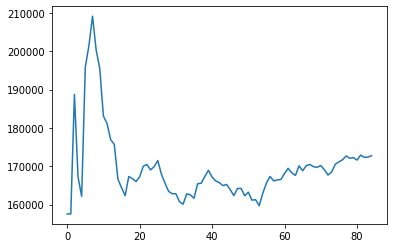

In [29]:
cum.plot()

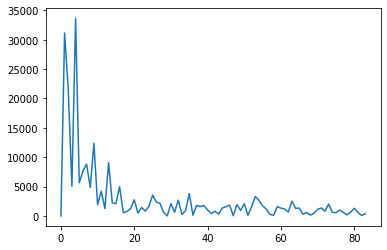

In [30]:
err.plot()

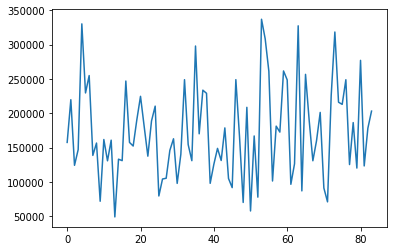

In [32]:
lat.plot()

In [34]:
test2 = cumulative_avg()

------------------------------reset binary gate------------------------------


2020-05-02 12:23:41:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:23:43:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:23:45:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:23:48:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:23:50:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     231506.400108
std       32085.589462
min       11799.335480
25%      234395.980835
50%      235563.993454
75%      236430.168152
max      268636.941910
Name: latency, dtype: float64
cumulative_avg, pre_avg: 234963.22631835938, 234963.22631835938
convergence ratio: 0.0
------------------------------reset binary gate------------------------------


2020-05-02 12:23:52:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:23:54:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:23:56:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:23:58:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:24:00:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     188944.635391
std       25579.908580
min       12421.369553
25%      192541.658878
50%      193121.790886
75%      193554.520607
max      194943.666458
Name: latency, dtype: float64
cumulative_avg, pre_avg: 213941.88404083252, 234963.22631835938
convergence ratio: 9.82572551035157
------------------------------reset binary gate------------------------------


2020-05-02 12:24:02:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:24:04:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:24:05:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:24:07:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:24:09:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     175304.222107
std       23757.884699
min       11291.265488
25%      178531.408310
50%      179051.876068
75%      179466.009140
max      181105.375290
Name: latency, dtype: float64
cumulative_avg, pre_avg: 202244.1864013672, 213941.88404083252
convergence ratio: 5.783947537681239
------------------------------reset binary gate------------------------------


2020-05-02 12:24:10:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:24:11:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:24:12:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:24:13:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:24:14:pid_34414:latency_estimator:<INFO> 50 times estimation


count       50.000000
mean     79425.172806
std      10754.798117
min       5214.214325
25%      80963.730812
50%      81123.113632
75%      81322.550774
max      81914.424896
Name: latency, dtype: float64
cumulative_avg, pre_avg: 171951.425075531, 202244.1864013672
convergence ratio: 17.61704580961155
------------------------------reset binary gate------------------------------


2020-05-02 12:24:15:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:24:16:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:24:18:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:24:19:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:24:21:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     139880.628586
std       18855.005930
min        9573.936462
25%      142489.492893
50%      142824.649811
75%      143155.813217
max      143882.989883
Name: latency, dtype: float64
cumulative_avg, pre_avg: 166111.421585083, 171951.425075531
convergence ratio: 3.515714593687179
------------------------------reset binary gate------------------------------


2020-05-02 12:24:22:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:24:23:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:24:25:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:24:26:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:24:27:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     118305.940628
std       16205.214501
min        6189.107895
25%      120352.327824
50%      120806.932449
75%      121047.675610
max      122026.681900
Name: latency, dtype: float64
cumulative_avg, pre_avg: 158547.314008077, 166111.421585083
convergence ratio: 4.770883457931472
------------------------------reset binary gate------------------------------


2020-05-02 12:24:29:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:24:31:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:24:33:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:24:36:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:24:38:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     210824.208260
std       29564.100047
min        6113.767624
25%      214692.234993
50%      215031.623840
75%      215690.195560
max      217274.904251
Name: latency, dtype: float64
cumulative_avg, pre_avg: 166602.441242763, 158547.314008077
convergence ratio: 4.834939497044073
------------------------------reset binary gate------------------------------


2020-05-02 12:24:42:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:24:46:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:24:51:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:24:55:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:24:59:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     430420.379639
std       60831.647485
min        9016.752243
25%      438770.174980
50%      439319.133759
75%      439771.592617
max      441080.808640
Name: latency, dtype: float64
cumulative_avg, pre_avg: 200667.2501564026, 166602.441242763
convergence ratio: 16.9757690341045
------------------------------reset binary gate------------------------------


2020-05-02 12:25:01:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:25:02:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:25:03:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:25:04:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:25:05:pid_34414:latency_estimator:<INFO> 50 times estimation


count       50.000000
mean     89768.328667
std      11469.970032
min      11236.190796
25%      91417.789459
50%      91673.851013
75%      91762.423515
max      95642.089844
Name: latency, dtype: float64
cumulative_avg, pre_avg: 188538.3341047499, 200667.2501564026
convergence ratio: 6.43312995696355
------------------------------reset binary gate------------------------------


2020-05-02 12:25:06:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:25:07:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:25:08:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:25:09:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:25:10:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     103521.876335
std       14181.247508
min        5516.290665
25%      105548.381805
50%      105838.894844
75%      105964.183807
max      106316.089630
Name: latency, dtype: float64
cumulative_avg, pre_avg: 180255.45120239258, 188538.3341047499
convergence ratio: 4.595080396796
------------------------------reset binary gate------------------------------


2020-05-02 12:25:12:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:25:14:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:25:16:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:25:18:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:25:20:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     196583.909988
std       27518.036616
min        6046.295166
25%      200246.274471
50%      200794.458389
75%      201204.836369
max      201711.654663
Name: latency, dtype: float64
cumulative_avg, pre_avg: 182084.2439478094, 180255.45120239258
convergence ratio: 1.0043662789082368
------------------------------reset binary gate------------------------------


2020-05-02 12:25:22:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:25:23:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:25:24:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:25:26:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:25:27:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     121857.333183
std       16483.534603
min        7850.170135
25%      124117.136002
50%      124499.678612
75%      124651.372433
max      126142.740250
Name: latency, dtype: float64
cumulative_avg, pre_avg: 177272.16879526773, 182084.2439478094
convergence ratio: 2.714512483964214
------------------------------reset binary gate------------------------------


2020-05-02 12:25:30:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:25:34:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:25:38:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:25:42:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:25:46:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     376977.901459
std       52335.400339
min       14492.273331
25%      384045.183659
50%      384663.224220
75%      385377.645493
max      387135.982513
Name: latency, dtype: float64
cumulative_avg, pre_avg: 193203.03109975962, 177272.16879526773
convergence ratio: 8.245658576788092
------------------------------reset binary gate------------------------------


2020-05-02 12:25:49:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:25:51:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:25:54:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:25:56:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:25:59:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     247477.874756
std       34606.900572
min        7793.903351
25%      252237.915993
50%      252661.824226
75%      252883.017063
max      254281.997681
Name: latency, dtype: float64
cumulative_avg, pre_avg: 197439.91579328265, 193203.03109975962
convergence ratio: 2.1459109099089138
------------------------------reset binary gate------------------------------


2020-05-02 12:26:00:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:26:01:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:26:01:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:26:02:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:26:02:pid_34414:latency_estimator:<INFO> 50 times estimation


count       50.000000
mean     57053.451538
std       7252.938289
min       7325.172424
25%      58107.018471
50%      58372.616768
75%      58538.794518
max      59285.402298
Name: latency, dtype: float64
cumulative_avg, pre_avg: 188161.79275512695, 197439.91579328265
convergence ratio: 4.930928273111327
------------------------------reset binary gate------------------------------


2020-05-02 12:26:04:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:26:06:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:26:09:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:26:11:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:26:13:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     201730.961800
std       27722.016119
min        9932.994843
25%      205394.983292
50%      205909.729004
75%      206395.387650
max      207343.578339
Name: latency, dtype: float64
cumulative_avg, pre_avg: 189250.2725124359, 188161.79275512695
convergence ratio: 0.5751536010271449
------------------------------reset binary gate------------------------------


2020-05-02 12:26:14:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:26:15:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:26:15:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:26:16:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:26:17:pid_34414:latency_estimator:<INFO> 50 times estimation


count       50.000000
mean     67195.501328
std       8379.991964
min      10088.443756
25%      68396.091461
50%      68604.588509
75%      68825.364113
max      70706.367493
Name: latency, dtype: float64
cumulative_avg, pre_avg: 182148.46779318416, 189250.2725124359
convergence ratio: 3.898909941595182
------------------------------reset binary gate------------------------------


2020-05-02 12:26:19:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:26:21:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:26:24:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:26:26:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:26:28:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     230288.939476
std       32072.452612
min        8170.366287
25%      234806.001186
50%      235105.037689
75%      235357.701778
max      236281.633377
Name: latency, dtype: float64
cumulative_avg, pre_avg: 185086.61323123507, 182148.46779318416
convergence ratio: 1.5874435145561736
------------------------------reset binary gate------------------------------


2020-05-02 12:26:31:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:26:33:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:26:35:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:26:37:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:26:39:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     205344.099998
std       28718.262686
min        6440.877914
25%      209387.362003
50%      209614.992142
75%      209794.282913
max      210655.927658
Name: latency, dtype: float64
cumulative_avg, pre_avg: 186373.7432580245, 185086.61323123507
convergence ratio: 0.6906176826676049
------------------------------reset binary gate------------------------------


2020-05-02 12:26:41:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:26:44:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:26:46:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:26:48:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:26:51:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     223941.445351
std       31409.155445
min        6411.552429
25%      227990.090847
50%      228564.500809
75%      228916.525841
max      231286.764145
Name: latency, dtype: float64
cumulative_avg, pre_avg: 188479.49743270874, 186373.7432580245
convergence ratio: 1.1172324859556846
------------------------------reset binary gate------------------------------


2020-05-02 12:26:52:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:26:52:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:26:53:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:26:54:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:26:55:pid_34414:latency_estimator:<INFO> 50 times estimation


count       50.000000
mean     73644.819260
std       9972.462012
min       4986.763000
25%      74892.520905
50%      75241.804123
75%      75412.809849
max      76107.978821
Name: latency, dtype: float64
cumulative_avg, pre_avg: 183077.88485572452, 188479.49743270874
convergence ratio: 2.9504451513851535
------------------------------reset binary gate------------------------------


2020-05-02 12:26:57:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:26:59:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:27:01:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:27:04:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:27:06:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     221533.031464
std       30627.514104
min        9540.319443
25%      225549.399853
50%      226020.097733
75%      226451.814175
max      227643.489838
Name: latency, dtype: float64
cumulative_avg, pre_avg: 185027.06831151788, 183077.88485572452
convergence ratio: 1.0534585418127307
------------------------------reset binary gate------------------------------


2020-05-02 12:27:07:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:27:08:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:27:09:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:27:10:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:27:11:pid_34414:latency_estimator:<INFO> 50 times estimation


count       50.000000
mean     91923.918724
std      12392.983801
min       6279.945374
25%      93528.151512
50%      93935.370445
75%      94154.953957
max      94824.790955
Name: latency, dtype: float64
cumulative_avg, pre_avg: 181060.01356373663, 185027.06831151788
convergence ratio: 2.1910164865776784
------------------------------reset binary gate------------------------------


2020-05-02 12:27:13:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:27:16:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:27:18:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:27:20:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:27:23:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     226192.131042
std       31239.374808
min        9870.052338
25%      230322.122574
50%      230808.258057
75%      231176.316738
max      232820.510864
Name: latency, dtype: float64
cumulative_avg, pre_avg: 183127.31583913168, 181060.01356373663
convergence ratio: 1.1288879902608704
------------------------------reset binary gate------------------------------


2020-05-02 12:27:26:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:27:29:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:27:32:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:27:35:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:27:39:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     311775.560379
std       43702.091367
min        9091.615677
25%      317692.279816
50%      318076.252937
75%      318726.062775
max      319313.764572
Name: latency, dtype: float64
cumulative_avg, pre_avg: 188515.15769958496, 183127.31583913168
convergence ratio: 2.8580417225861834
------------------------------reset binary gate------------------------------


2020-05-02 12:27:40:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:27:40:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:27:41:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:27:42:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:27:42:pid_34414:latency_estimator:<INFO> 50 times estimation


count       50.000000
mean     63065.686226
std       7939.746049
min       8964.300156
25%      64263.641834
50%      64468.026161
75%      64591.944218
max      65673.589706
Name: latency, dtype: float64
cumulative_avg, pre_avg: 183741.46131368785, 188515.15769958496
convergence ratio: 2.5980507348569217
------------------------------reset binary gate------------------------------


2020-05-02 12:27:44:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:27:46:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:27:47:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:27:49:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:27:50:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     155113.754272
std       20975.806741
min       10015.249252
25%      157993.018627
50%      158296.585083
75%      158699.095249
max      159280.776978
Name: latency, dtype: float64
cumulative_avg, pre_avg: 182796.53831764503, 183741.46131368785
convergence ratio: 0.5169260888304297
------------------------------reset binary gate------------------------------


2020-05-02 12:27:53:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:27:55:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:27:57:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:27:59:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:28:02:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     222020.392418
std       31281.661201
min        5361.080170
25%      226166.009903
50%      226728.200912
75%      226989.269257
max      227992.773056
Name: latency, dtype: float64
cumulative_avg, pre_avg: 184360.2418899536, 182796.53831764503
convergence ratio: 0.8481783036724242
------------------------------reset binary gate------------------------------


2020-05-02 12:28:04:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:28:06:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:28:08:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:28:09:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:28:11:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     179420.480728
std       25167.712159
min        5204.439163
25%      182875.096798
50%      183193.445206
75%      183394.193649
max      184649.705887
Name: latency, dtype: float64
cumulative_avg, pre_avg: 184315.94947288776, 184360.2418899536
convergence ratio: 0.024030702276455398
------------------------------reset binary gate------------------------------


2020-05-02 12:28:13:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:28:15:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:28:16:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:28:18:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:28:20:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     160906.686783
std       22366.643649
min        6082.773209
25%      163766.920567
50%      164020.419121
75%      164700.806141
max      165676.593781
Name: latency, dtype: float64
cumulative_avg, pre_avg: 183637.79385884604, 184315.94947288776
convergence ratio: 0.36928978495733317
------------------------------reset binary gate------------------------------


2020-05-02 12:28:21:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:28:22:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:28:24:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:28:25:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:28:26:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     123731.522560
std       17056.927797
min        5829.572678
25%      125890.552998
50%      126208.901405
75%      126738.727093
max      129103.183746
Name: latency, dtype: float64
cumulative_avg, pre_avg: 181781.1627541819, 183637.79385884604
convergence ratio: 1.0213550604111963
------------------------------reset binary gate------------------------------


2020-05-02 12:28:29:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:28:32:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:28:35:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:28:37:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:28:40:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     278715.076447
std       38891.114447
min        9349.346161
25%      284184.575081
50%      284495.234489
75%      284766.614437
max      285620.450974
Name: latency, dtype: float64
cumulative_avg, pre_avg: 184987.40941286087, 181781.1627541819
convergence ratio: 1.7332242604269226
------------------------------reset binary gate------------------------------


2020-05-02 12:28:42:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:28:43:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:28:44:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:28:45:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:28:46:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     103874.053955
std       14201.943861
min        5797.624588
25%      105858.922005
50%      106115.579605
75%      106425.344944
max      107651.233673
Name: latency, dtype: float64
cumulative_avg, pre_avg: 182594.02043891675, 184987.40941286087
convergence ratio: 1.3107707296169555
------------------------------reset binary gate------------------------------


2020-05-02 12:28:48:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:28:51:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:28:53:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:28:55:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:28:58:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     230972.361565
std       32463.547342
min        6102.800369
25%      235374.033451
50%      235738.635063
75%      236066.043377
max      236908.197403
Name: latency, dtype: float64
cumulative_avg, pre_avg: 184154.24403022317, 182594.02043891675
convergence ratio: 0.8472373794710697
------------------------------reset binary gate------------------------------


2020-05-02 12:29:00:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:29:02:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:29:04:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:29:06:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:29:08:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     189082.422256
std       26469.438744
min        5766.153336
25%      192379.355431
50%      192860.245705
75%      193475.663662
max      194686.412811
Name: latency, dtype: float64
cumulative_avg, pre_avg: 184395.7928248814, 184154.24403022317
convergence ratio: 0.1309947428614272
------------------------------reset binary gate------------------------------


2020-05-02 12:29:11:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:29:13:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:29:16:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:29:19:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:29:22:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     278303.704262
std       39264.613786
min        6305.456161
25%      283446.788788
50%      284054.875374
75%      284395.933151
max      285834.074020
Name: latency, dtype: float64
cumulative_avg, pre_avg: 187160.80056296455, 184395.7928248814
convergence ratio: 1.4773434019122678
------------------------------reset binary gate------------------------------


2020-05-02 12:29:24:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:29:26:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:29:28:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:29:30:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:29:31:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     176286.172867
std       24755.186749
min        4906.892776
25%      179735.064507
50%      179968.953133
75%      180290.877819
max      180776.119232
Name: latency, dtype: float64
cumulative_avg, pre_avg: 186964.89720731167, 187160.80056296455
convergence ratio: 0.10478082173663379
------------------------------reset binary gate------------------------------


2020-05-02 12:29:33:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:29:33:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:29:34:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:29:35:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:29:36:pid_34414:latency_estimator:<INFO> 50 times estimation


count       50.000000
mean     75911.564827
std      10076.871307
min       6318.569183
25%      77375.650406
50%      77563.762665
75%      77746.093273
max      78339.576721
Name: latency, dtype: float64
cumulative_avg, pre_avg: 184083.51571936355, 186964.89720731167
convergence ratio: 1.565257745479397
------------------------------reset binary gate------------------------------


2020-05-02 12:29:37:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:29:38:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:29:39:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:29:40:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:29:41:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     102621.574402
std       13331.089142
min       10798.215866
25%      104505.717754
50%      104705.452919
75%      105027.973652
max      105777.263641
Name: latency, dtype: float64
cumulative_avg, pre_avg: 182047.13723598383, 184083.51571936355
convergence ratio: 1.1185995639909523
------------------------------reset binary gate------------------------------


2020-05-02 12:29:43:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:29:44:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:29:46:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:29:47:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:29:49:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     149666.323662
std       20745.223558
min        6026.983261
25%      152351.856232
50%      152790.069580
75%      153044.223785
max      153811.454773
Name: latency, dtype: float64
cumulative_avg, pre_avg: 181312.04962730408, 182047.13723598383
convergence ratio: 0.40542678227440465
------------------------------reset binary gate------------------------------


2020-05-02 12:29:50:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:29:52:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:29:53:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:29:55:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:29:56:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     139150.099754
std       19362.567695
min        5103.349686
25%      141755.402088
50%      142066.597939
75%      142281.949520
max      143635.511398
Name: latency, dtype: float64
cumulative_avg, pre_avg: 180351.89582080377, 181312.04962730408
convergence ratio: 0.5323779947699097
------------------------------reset binary gate------------------------------


2020-05-02 12:29:58:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:30:01:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:30:03:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:30:05:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:30:08:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     229929.232597
std       32329.274599
min        6073.951721
25%      234329.760075
50%      234751.105309
75%      234963.417053
max      236653.327942
Name: latency, dtype: float64
cumulative_avg, pre_avg: 181645.02325512114, 180351.89582080377
convergence ratio: 0.7118980807424431
------------------------------reset binary gate------------------------------


2020-05-02 12:30:09:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:30:11:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:30:12:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:30:13:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:30:14:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     114600.009918
std       15736.288173
min        5787.134171
25%      116734.921932
50%      117108.106613
75%      117267.429829
max      118148.326874
Name: latency, dtype: float64
cumulative_avg, pre_avg: 180141.47891554722, 181645.02325512114
convergence ratio: 0.8346463838452193
------------------------------reset binary gate------------------------------


2020-05-02 12:30:16:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:30:17:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:30:19:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:30:20:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:30:22:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     147212.157249
std       19725.621656
min       10919.809341
25%      149987.578392
50%      150236.368179
75%      150599.002838
max      151569.128036
Name: latency, dtype: float64
cumulative_avg, pre_avg: 179460.42689410123, 180141.47891554722
convergence ratio: 0.3794998336028049
------------------------------reset binary gate------------------------------


2020-05-02 12:30:24:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:30:25:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:30:27:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:30:29:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:30:31:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     177801.146507
std       24753.356768
min        6446.361542
25%      181144.297123
50%      181502.342224
75%      181773.304939
max      183755.636215
Name: latency, dtype: float64
cumulative_avg, pre_avg: 179503.29568650987, 179460.42689410123
convergence ratio: 0.023881897123219465
------------------------------reset binary gate------------------------------


2020-05-02 12:30:33:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:30:35:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:30:38:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:30:40:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:30:42:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     215619.053841
std       30383.464645
min        5167.245865
25%      219730.556011
50%      220043.659210
75%      220307.588577
max      221699.953079
Name: latency, dtype: float64
cumulative_avg, pre_avg: 180381.70855978262, 179503.29568650987
convergence ratio: 0.48697447223792584
------------------------------reset binary gate------------------------------


2020-05-02 12:30:44:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:30:46:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:30:48:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:30:50:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:30:52:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     181662.688255
std       24481.869687
min       12541.532516
25%      185074.627399
50%      185475.349426
75%      185907.602310
max      187657.117844
Name: latency, dtype: float64
cumulative_avg, pre_avg: 180488.30742531634, 180381.70855978262
convergence ratio: 0.05906136915701447
------------------------------reset binary gate------------------------------


2020-05-02 12:30:53:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:30:53:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:30:54:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:30:55:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:30:56:pid_34414:latency_estimator:<INFO> 50 times estimation


count       50.000000
mean     74586.915970
std       9406.023725
min      10360.717773
25%      75940.310955
50%      76202.630997
75%      76515.436172
max      77316.761017
Name: latency, dtype: float64
cumulative_avg, pre_avg: 178313.90897432962, 180488.30742531634
convergence ratio: 1.219421672428114
------------------------------reset binary gate------------------------------


2020-05-02 12:30:57:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:30:58:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:30:59:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:31:00:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:31:01:pid_34414:latency_estimator:<INFO> 50 times estimation


count       50.000000
mean     96183.505058
std      12614.146833
min       9099.960327
25%      97873.628139
50%      98187.565804
75%      98460.197449
max      99199.295044
Name: latency, dtype: float64
cumulative_avg, pre_avg: 176677.12289459852, 178313.90897432962
convergence ratio: 0.9264278548997931
------------------------------reset binary gate------------------------------


2020-05-02 12:31:02:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:31:04:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:31:05:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:31:07:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:31:08:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     145731.964111
std       19813.509163
min        8831.739426
25%      148535.132408
50%      148911.476135
75%      149045.944214
max      150784.254074
Name: latency, dtype: float64
cumulative_avg, pre_avg: 176120.099067688, 176677.12289459852
convergence ratio: 0.31627499067920234
------------------------------reset binary gate------------------------------


2020-05-02 12:31:12:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:31:15:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:31:19:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:31:22:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:31:26:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     344123.001099
std       47944.902386
min       12012.720108
25%      350809.931755
50%      351146.697998
75%      351581.692696
max      352391.242981
Name: latency, dtype: float64
cumulative_avg, pre_avg: 179550.1381743188, 176120.099067688
convergence ratio: 1.9103516942441476
------------------------------reset binary gate------------------------------


2020-05-02 12:31:28:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:31:29:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:31:30:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:31:32:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:31:33:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     131570.558548
std       17499.424219
min       10862.350464
25%      133911.430836
50%      134274.482727
75%      134523.093700
max      140575.408936
Name: latency, dtype: float64
cumulative_avg, pre_avg: 178677.7982344994, 179550.1381743188
convergence ratio: 0.4882195485051338
reset times, hit counts: 51, 1
------------------------------reset binary gate------------------------------


2020-05-02 12:31:34:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:31:34:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:31:35:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:31:36:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:31:36:pid_34414:latency_estimator:<INFO> 50 times estimation


count       50.000000
mean     53639.130592
std       6053.436122
min      13221.740723
25%      54551.422596
50%      54803.967476
75%      54944.157600
max      57668.924332
Name: latency, dtype: float64
cumulative_avg, pre_avg: 176339.23134713803, 178677.7982344994
convergence ratio: 1.3261750487942856
------------------------------reset binary gate------------------------------


2020-05-02 12:31:38:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:31:40:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:31:42:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:31:44:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:31:45:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     183809.533119
std       24234.415361
min       17067.909241
25%      187330.186367
50%      187865.853310
75%      188118.994236
max      189312.934875
Name: latency, dtype: float64
cumulative_avg, pre_avg: 176550.66914028593, 176339.23134713803
convergence ratio: 0.11976040316215891
reset times, hit counts: 53, 1
------------------------------reset binary gate------------------------------


2020-05-02 12:31:47:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:31:49:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:31:51:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:31:52:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:31:54:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     159924.621582
std       21301.529488
min       12907.505035
25%      162923.753262
50%      163272.976875
75%      163554.668427
max      165267.944336
Name: latency, dtype: float64
cumulative_avg, pre_avg: 176307.3444366455, 176550.66914028593
convergence ratio: 0.1380116661718863
reset times, hit counts: 54, 2
------------------------------reset binary gate------------------------------


2020-05-02 12:31:56:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:31:58:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:32:01:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:32:03:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:32:05:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     225383.214951
std       30899.181829
min       11545.181274
25%      229670.107365
50%      229988.455772
75%      230411.946774
max      233375.072479
Name: latency, dtype: float64
cumulative_avg, pre_avg: 177263.99387632098, 176307.3444366455
convergence ratio: 0.5396749891255053
reset times, hit counts: 55, 3
------------------------------reset binary gate------------------------------


2020-05-02 12:32:07:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:32:09:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:32:10:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:32:11:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:32:13:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     135236.511230
std       17980.000095
min       11229.276657
25%      137795.150280
50%      137995.600700
75%      138360.619545
max      139591.932297
Name: latency, dtype: float64
cumulative_avg, pre_avg: 176574.48450724283, 177263.99387632098
convergence ratio: 0.39049207534278135
reset times, hit counts: 56, 4
------------------------------reset binary gate------------------------------


2020-05-02 12:32:15:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:32:17:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:32:19:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:32:21:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:32:23:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     203428.821564
std       27835.223463
min       10791.063309
25%      207053.482533
50%      207498.788834
75%      207922.399044
max      209537.506104
Name: latency, dtype: float64
cumulative_avg, pre_avg: 177105.03627514018, 176574.48450724283
convergence ratio: 0.299568989711349
reset times, hit counts: 57, 5
------------------------------reset binary gate------------------------------


2020-05-02 12:32:24:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:32:26:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:32:27:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:32:28:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:32:29:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     100459.971428
std       13658.001101
min        5966.424942
25%      102315.008640
50%      102548.718452
75%      102733.850479
max      103351.593018
Name: latency, dtype: float64
cumulative_avg, pre_avg: 175839.18975571456, 177105.03627514018
convergence ratio: 0.7198887353747542
reset times, hit counts: 58, 6
------------------------------reset binary gate------------------------------


2020-05-02 12:32:30:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:32:31:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:32:32:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:32:33:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:32:34:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean      98424.277306
std       12703.689557
min       10865.926743
25%      100308.418274
50%      100472.927094
75%      100764.691830
max      101303.339005
Name: latency, dtype: float64
cumulative_avg, pre_avg: 174582.10388819376, 175839.18975571456
convergence ratio: 0.7200542550030591
reset times, hit counts: 59, 7
------------------------------reset binary gate------------------------------


2020-05-02 12:32:35:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:32:36:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:32:37:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:32:38:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:32:39:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     100481.581688
std       13143.479869
min        9755.373001
25%      102208.793163
50%      102575.302124
75%      102831.959724
max      104483.366013
Name: latency, dtype: float64
cumulative_avg, pre_avg: 173400.06593798028, 174582.10388819376
convergence ratio: 0.6816825263701182
reset times, hit counts: 60, 8
------------------------------reset binary gate------------------------------


2020-05-02 12:32:41:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:32:43:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:32:45:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:32:47:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:32:49:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     194978.413582
std       26907.776316
min        8674.383163
25%      198543.071747
50%      198961.973190
75%      199396.073818
max      200613.260269
Name: latency, dtype: float64
cumulative_avg, pre_avg: 173809.53834902856, 173400.06593798028
convergence ratio: 0.23558684692321835
reset times, hit counts: 61, 9
------------------------------reset binary gate------------------------------


2020-05-02 12:32:51:pid_34414:latency_estimator:<INFO> 10 times estimation
2020-05-02 12:32:53:pid_34414:latency_estimator:<INFO> 20 times estimation
2020-05-02 12:32:54:pid_34414:latency_estimator:<INFO> 30 times estimation
2020-05-02 12:32:56:pid_34414:latency_estimator:<INFO> 40 times estimation
2020-05-02 12:32:58:pid_34414:latency_estimator:<INFO> 50 times estimation


count        50.000000
mean     166475.524902
std       22473.398032
min       11186.599731
25%      169531.643391
50%      169944.286346
75%      170357.048512
max      171760.559082
Name: latency, dtype: float64
cumulative_avg, pre_avg: 173745.10083879743, 173809.53834902856
convergence ratio: 0.037087382562180714
reset times, hit counts: 62, 10


In [38]:
cum2, err2, lat2= pd.Series(test2[0]), pd.Series(test2[1]), pd.Series(test2[2])

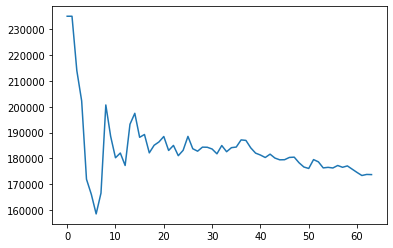

In [39]:
cum2.plot()

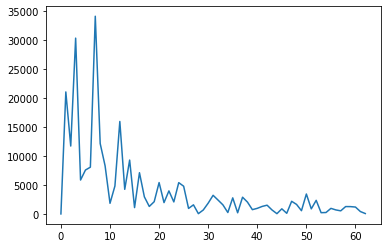

In [40]:
err2.plot()

In [ ]:
from